# Complete Natural Language Processing (NLP) Tutorial
## A Comprehensive Guide to Text Processing and Analysis

Welcome to this comprehensive tutorial on Natural Language Processing! In this notebook, we'll explore the fundamental concepts and practical techniques used in NLP, from basic text preprocessing to advanced classification tasks.

## What You'll Learn:

- ✅ **Text Preprocessing**: Cleaning, tokenization, and normalization
- ✅ **Regular Expressions**: Pattern matching and text extraction  
- ✅ **Feature Engineering**: Stop words, stemming, lemmatization, n-grams
- ✅ **Word Vectorization**: Count vectorization and TF-IDF
- ✅ **Grammar Analysis**: Context-free grammars and POS tagging
- ✅ **Text Classification**: Building complete ML pipelines
- ✅ **Ethics**: Responsible NLP practices

## Prerequisites:
- Basic Python programming knowledge
- Understanding of machine learning concepts
- Familiarity with pandas and numpy

---

Let's begin our journey into the fascinating world of Natural Language Processing!

# 1. Setting Up the Environment

Before we dive into NLP, let's set up our working environment by importing all the necessary libraries and downloading required NLTK data.


In [47]:
# Import essential libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import NLTK specific modules
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist, bigrams, trigrams, ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import CFG, ChartParser
from nltk import pos_tag

# Import scikit-learn for machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print("🚀 Environment setup complete!")

📚 All libraries imported successfully!
🚀 Environment setup complete!


In [48]:
# Download required NLTK data
print("⬇️ Downloading NLTK data...")

nltk_downloads = [
    'punkt',           # Tokenizer (legacy)
    'punkt_tab',       # Tokenizer (new version)
    'stopwords',       # Stop words
    'wordnet',         # WordNet lemmatizer
    'averaged_perceptron_tagger',     # POS tagger (legacy)
    'averaged_perceptron_tagger_eng', # POS tagger (new version)
    'gutenberg',       # Sample texts
    'omw-1.4',        # Multilingual wordnet
    'vader_lexicon'    # Sentiment analysis
]

for item in nltk_downloads:
    try:
        nltk.download(item, quiet=True)
        print(f" Downloaded: {item}")
    except Exception as e:
        print(f"{item}: {str(e)[:50]}...")

print("\n NLTK setup complete!")

⬇️ Downloading NLTK data...
 Downloaded: punkt
 Downloaded: punkt_tab
 Downloaded: stopwords
 Downloaded: wordnet
 Downloaded: averaged_perceptron_tagger
 Downloaded: averaged_perceptron_tagger_eng
 Downloaded: gutenberg
 Downloaded: omw-1.4
 Downloaded: vader_lexicon

 NLTK setup complete!


# 2. What is Natural Language Processing?


**Natural Language Processing (NLP)** is a branch of artificial intelligence that helps computers understand, interpret, and manipulate human language. It sits at the intersection of:

- 🖥️ **Computer Science**: Algorithms and computational methods
- 🧠 **Artificial Intelligence**: Machine learning and pattern recognition  
- 📝 **Linguistics**: Understanding of language structure and meaning
- 📊 **Information Theory**: Processing and analyzing text data

## Key Applications of NLP:

1. **Chatbots & Virtual Assistants** (Siri, Alexa, ChatGPT)
2. **Sentiment Analysis** (Social media monitoring, product reviews)
3. **Machine Translation** (Google Translate, DeepL)
4. **Text Summarization** (News articles, research papers)
5. **Spam Detection** (Email filtering)
6. **Information Extraction** (Named entity recognition)

## Evolution of NLP:

- **1950s-1980s**: Rule-based systems with manual linguistics rules
- **1980s-2010s**: Statistical methods and machine learning
- **2010s-Present**: Deep learning and transformer models (BERT, GPT)

Let's explore some basic NLP concepts with simple examples!

In [ ]:
# Let's see NLP in action with a simple example
sample_text = """
Natural Language Processing is amazing! It allows computers to understand human language.
With NLP, we can analyze emotions, extract information, and even generate text. 
The future of AI heavily relies on NLP advancements.
"""

print("Original Text:")
print(sample_text)
print("\n" + "="*50)

# Basic text statistics
words = sample_text.split() # Tokenizing words
sentences = sample_text.split('.') # Tokenizing sentences by period

print(f"Basic Statistics:")
print(f"• Characters: {len(sample_text)}")
print(f"• Words: {len(words)}")
print(f"• Sentences: {len([s for s in sentences if s.strip()])}")
print(f"• Average words per sentence: {len(words) / len([s for s in sentences if s.strip()]):.1f}")

print("\n💡 This is just the beginning! Let's dive deeper...")

Original Text:

Natural Language Processing is amazing! It allows computers to understand human language.
With NLP, we can analyze emotions, extract information, and even generate text. 
The future of AI heavily relies on NLP advancements.


Basic Statistics:
• Characters: 225
• Words: 33
• Sentences: 3
• Average words per sentence: 11.0

💡 This is just the beginning! Let's dive deeper...


# 3. Introduction to NLTK


The **Natural Language Toolkit (NLTK)** is one of the most popular Python libraries for NLP. Developed at the University of Pennsylvania, it provides:

## Key Features:
- 📚 **Corpora**: Access to over 50 text corpora and lexical resources
- 🔧 **Tools**: Tokenization, stemming, lemmatization, parsing
- 📊 **Statistics**: Frequency distributions, n-grams, collocation
- 🤖 **Classifiers**: Built-in machine learning algorithms
- 📖 **Linguistic Resources**: WordNet, Penn Treebank, etc.

Let's explore NLTK's capabilities with practical examples!

In [ ]:
# Exploring NLTK's capabilities
print("🔍 Exploring NLTK Corpora:")
print("Available corpora: NLTK provides many text collections")

# Let's check some popular corpora by trying to access them
# corpora are collections of texts that NLTK provides for analysis
popular_corpora = ['gutenberg', 'reuters', 'brown', 'movie_reviews']
for corpus_name in popular_corpora:
    try:
        # Try to access the corpus
        corpus = getattr(nltk.corpus, corpus_name)
        # If we can access it without error, it's available
        print(f"✅ {corpus_name.capitalize()}: Available") #
    except AttributeError:
        print(f"❌ {corpus_name.capitalize()}: Not available")
    except Exception:
        print(f"⚠️ {corpus_name.capitalize()}: May need additional download")

print("\n📚 Sample text from Gutenberg collection:")
try:
    # Get file IDs from gutenberg corpus
    files = gutenberg.fileids() # Get file from gutenberg corpus
    print(f"Available books: {len(files)}")
    print("Sample books:", files[:5])
    
    # Load a sample text (Alice in Wonderland)
    if 'carroll-alice.txt' in files:
        alice_text = gutenberg.raw('carroll-alice.txt')[:500]
        print(f"\n📖 First 500 characters from 'Alice in Wonderland':")
        print(alice_text[:200] + "...")
    
except Exception as e:
    print(f"Error loading corpus: {e}")


🔍 Exploring NLTK Corpora:
Available corpora: NLTK provides many text collections
✅ Gutenberg: Available
✅ Reuters: Available
✅ Brown: Available
✅ Movie_reviews: Available

📚 Sample text from Gutenberg collection:
Available books: 18
Sample books: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt']

📖 First 500 characters from 'Alice in Wonderland':
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once...


# 4. Text Preprocessing and Tokenization

Text preprocessing is a crucial step in NLP that prepares raw text for analysis. It involves several steps:

## Key Preprocessing Steps:

1. **Lowercasing**: Convert all text to lowercase
2. **Punctuation Removal**: Remove special characters and punctuation
3. **Tokenization**: Split text into individual words or tokens
4. **Noise Removal**: Remove URLs, numbers, special formatting

## Tokenization Types:
- **Word Tokenization**: Split text into words
- **Sentence Tokenization**: Split text into sentences  
- **Subword Tokenization**: Split words into smaller units

Let's implement these preprocessing steps!

[def]: https://miro.medium.com/max/1400/1*sO-wEk_gyVLYb7lqYLMvDw.png

In [ ]:
# Practical tokenization examples
sample_messy_text = """
Hello World! This is a SAMPLE text with different CASES, punctuation marks!!!, 
numbers like 123, emails like john.doe@email.com, URLs like https://example.com,
and contractions like don't, can't, won't. Let's process this text! 🚀
"""

print("📝 Original messy text:")
print(sample_messy_text)
print("\n" + "="*60)

# Step 1: Basic cleaning
def basic_clean(text):
    """Basic text cleaning function"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs (basic pattern)
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove email addresses  
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

cleaned_text = basic_clean(sample_messy_text)
print("🧹 After basic cleaning:")
print(cleaned_text)
print("\n" + "-"*60)

# Step 2: Tokenization
print("🔪 Tokenization Examples:")

# Word tokenization
word_tokens = word_tokenize(cleaned_text) # Get word tokens by splitting on whitespace and punctuation
print(f"Word tokens ({len(word_tokens)}):")
print(word_tokens[:15], "...")

# Sentence tokenization  
sentences = sent_tokenize(sample_messy_text) # Get sentence tokens by splitting on punctuation like periods.
print(f"\nSentence tokens ({len(sentences)}):")
for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence.strip()}")

# Custom tokenization with regex
custom_pattern = r"[a-zA-Z]+(?:'[a-z]+)?"  # Captures contractions 
custom_tokens = regexp_tokenize(cleaned_text, custom_pattern) 
print(f"\nCustom tokens (with contractions) ({len(custom_tokens)}):")
print(custom_tokens[:15], "...")

📝 Original messy text:

Hello World! This is a SAMPLE text with different CASES, punctuation marks!!!, 
numbers like 123, emails like john.doe@email.com, URLs like https://example.com,
and contractions like don't, can't, won't. Let's process this text! 🚀


🧹 After basic cleaning:
hello world! this is a sample text with different cases, punctuation marks!!!, numbers like , emails like urls like and contractions like don't, can't, won't. let's process this text! 🚀

------------------------------------------------------------
🔪 Tokenization Examples:
Word tokens (44):
['hello', 'world', '!', 'this', 'is', 'a', 'sample', 'text', 'with', 'different', 'cases', ',', 'punctuation', 'marks', '!'] ...

Sentence tokens (5):
1. Hello World!
2. This is a SAMPLE text with different CASES, punctuation marks!!
3. !, 
numbers like 123, emails like john.doe@email.com, URLs like https://example.com,
and contractions like don't, can't, won't.
4. Let's process this text!
5. 🚀

Custom tokens (with contracti

### Understanding Different Types of Tokenization

Tokenization is the process of breaking text into smaller units. There are different approaches depending on what you want to analyze:

## **1. Word Tokenization** 📝
- **Purpose**: Split text into individual **words/tokens**
- **Method**: Breaks at spaces, punctuation, and word boundaries
- **Use Cases**: Word frequency analysis, stemming, lemmatization, POS tagging
- **Example**: 
  ```
  Input:  "Hello world! How are you?"
  Output: ['Hello', 'world', '!', 'How', 'are', 'you', '?']
  ```

## **2. Sentence Tokenization** 📄
- **Purpose**: Split text into complete **sentences**
- **Method**: Breaks at sentence boundaries (periods, exclamation marks, question marks)
- **Use Cases**: Text summarization, sentence-level analysis, translation
- **Example**: 
  ```
  Input:  "Hello world! How are you? I'm fine."
  Output: ['Hello world!', 'How are you?', "I'm fine."]
  ```

## **3. Custom Tokenization** 🎯
- **Purpose**: Split text using **custom patterns** (regex)
- **Method**: Uses regular expressions to define exactly what constitutes a token
- **Use Cases**: Preserving contractions, handling special formats, domain-specific tokenization
- **Example** (contractions preserved): 
  ```
  Input:  "don't can't won't"
  Output: ["don't", "can't", "won't"]
  ```

## **Key Differences:**

| Type | Splits On | Output Size | Best For |
|------|-----------|-------------|----------|
| **Word** | Spaces, punctuation | Many small tokens | Word-level analysis |
| **Sentence** | Sentence endings | Fewer, longer units | Document structure |
| **Custom** | Your defined pattern | Depends on pattern | Specific requirements |

**💡 Pro Tip**: Choose tokenization based on your analysis goal - words for vocabulary analysis, sentences for summarization, custom for special cases!

# 5. Regular Expressions for Text


**Regular Expressions (Regex)** are powerful patterns used for matching and manipulating text. They're essential for:

- 🔍 **Pattern Matching**: Finding specific text patterns
- ✂️ **Text Extraction**: Extracting emails, phone numbers, URLs
- 🧹 **Data Cleaning**: Removing unwanted characters
- 🎯 **Custom Tokenization**: Advanced text splitting

## Common Regex Patterns:

| Pattern | Description | Example |
|---------|-------------|---------|
| `\d` | Any digit | `123` matches `\d+` |
| `\w` | Word character | `hello` matches `\w+` |
| `\s` | Whitespace | Space, tab, newline |
| `[a-z]` | Character range | Lowercase letters |
| `+` | One or more | `\d+` matches one or more digits |
| `*` | Zero or more | `\d*` matches zero or more digits |
| `?` | Zero or one | `\d?` matches zero or one digit |




Let's practice with real examples!

In [ ]:
# Practical regex examples
text_with_data = """
Contact us at: support@company.com or sales@company.com
Phone numbers: (555) 123-4567, +1-800-555-0199, 555.123.4567
Prices: $10.99, $25.50, $1,299.99
Dates: 2023-12-25, 12/25/2023, Dec 25, 2023
URLs: https://www.example.com, http://test.org, www.site.net
"""

print("📧 Original text with various data types:")
print(text_with_data)
print("\n" + "="*50)

# Extract emails
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
emails = re.findall(email_pattern, text_with_data)
print("📧 Email addresses found:")
for email in emails:
    print(f"  • {email}")

# Extract phone numbers
phone_pattern = r'(\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}|\+\d{1,3}[-.\s]?\d{3}[-.\s]?\d{3}[-.\s]?\d{4})'
phones = re.findall(phone_pattern, text_with_data)
print(f"\n📞 Phone numbers found:")
for phone in phones:
    print(f"  • {phone}")

# Extract prices
price_pattern = r'\$[\d,]+\.?\d*'
prices = re.findall(price_pattern, text_with_data)
print(f"\n💰 Prices found:")
for price in prices:
    print(f"  • {price}")

# Extract URLs
url_pattern = r'https?://[^\s]+|www\.[^\s]+'
urls = re.findall(url_pattern, text_with_data)
print(f"\n🌐 URLs found:")
for url in urls:
    print(f"  • {url}")

# Custom tokenization using regex
print(f"\n🔪 Custom tokenization (words only):")
word_pattern = r'\b[A-Za-z]+\b'
words_only = re.findall(word_pattern, text_with_data)
print(f"Found {len(words_only)} words: {words_only[:10]}...")

print("\n✨ Regex is powerful for pattern matching and extraction!")

📧 Original text with various data types:

Contact us at: support@company.com or sales@company.com
Phone numbers: (555) 123-4567, +1-800-555-0199, 555.123.4567
Prices: $10.99, $25.50, $1,299.99
Dates: 2023-12-25, 12/25/2023, Dec 25, 2023
URLs: https://www.example.com, http://test.org, www.site.net


📧 Email addresses found:
  • support@company.com
  • sales@company.com

📞 Phone numbers found:
  • (555) 123-4567
  • +1-800-555-0199
  • 555.123.4567

💰 Prices found:
  • $10.99
  • $25.50
  • $1,299.99

🌐 URLs found:
  • https://www.example.com,
  • http://test.org,
  • www.site.net

🔪 Custom tokenization (words only):
Found 26 words: ['Contact', 'us', 'at', 'support', 'company', 'com', 'or', 'sales', 'company', 'com']...

✨ Regex is powerful for pattern matching and extraction!


# 6. Stop Words Removal


**Stop words** are common words that appear frequently in text but carry little meaningful information for analysis. Examples include: "the", "is", "at", "which", "on", etc.

## Why Remove Stop Words?

- 🎯 **Focus on Content**: Highlights meaningful words
- 📉 **Reduce Dimensionality**: Smaller feature space
- ⚡ **Improve Performance**: Faster processing and training
- 🎯 **Better Analysis**: More relevant word frequencies

## Types of Stop Words:
- **Function Words**: Articles, prepositions, conjunctions
- **Pronouns**: I, you, he, she, it, we, they
- **Common Verbs**: is, are, was, were, have, has

Let's implement stop word removal!

In [ ]:
# Stop words removal implementation
sample_paragraph = """
Natural language processing is a fascinating field that combines computer science, 
artificial intelligence, and linguistics. It enables computers to understand, 
interpret, and generate human language in a way that is both meaningful and useful.
The applications of NLP are vast and include machine translation, sentiment analysis, 
chatbots, and information extraction from large volumes of text.
"""

print("📄 Original paragraph:")
print(sample_paragraph)
print("\n" + "="*60)

# Get English stop words from NLTK
stop_words = set(stopwords.words('english')) # Get stop words from NLTK corpus
print(f"📊 Number of English stop words: {len(stop_words)}")
print(f"Sample stop words: {list(stop_words)[:20]}")

# Add punctuation to stop words
stop_words_extended = stop_words.union(set(string.punctuation)) # Add punctuation to stop words e.g. "!", ".", ",", etc.
print(f"Extended stop words (with punctuation): {len(stop_words_extended)}")

print("\n" + "-"*60)

# Tokenize the text
tokens = word_tokenize(sample_paragraph.lower())
print(f"🔪 Original tokens ({len(tokens)}):")
print(tokens)

# Remove stop words
filtered_tokens = [word for word in tokens if word not in stop_words_extended]
print(f"\n✂️ After removing stop words ({len(filtered_tokens)}):")
print(filtered_tokens)

# Compare the results
print(f"\n📈 Comparison:")
print(f"• Original word count: {len(tokens)}")
print(f"• After stop word removal: {len(filtered_tokens)}")
print(f"• Reduction: {((len(tokens) - len(filtered_tokens)) / len(tokens) * 100):.1f}%")

# Visualize the difference
print(f"\n🔍 Words removed (stop words):")
removed_words = [word for word in tokens if word in stop_words_extended]
removed_word_counts = Counter(removed_words)
for word, count in removed_word_counts.most_common():
    print(f"  • '{word}': {count} times")

print(f"\n💡 Key content words remaining: {filtered_tokens[:10]}...")
print("🎯 Stop word removal helps focus on meaningful content!")

📄 Original paragraph:

Natural language processing is a fascinating field that combines computer science, 
artificial intelligence, and linguistics. It enables computers to understand, 
interpret, and generate human language in a way that is both meaningful and useful.
The applications of NLP are vast and include machine translation, sentiment analysis, 
chatbots, and information extraction from large volumes of text.


📊 Number of English stop words: 198
Sample stop words: ['been', 'through', 'this', "you've", 'once', 'more', 'he', 'both', 'yourself', 'same', 'but', "you'll", "she'd", 'me', 'be', 'will', "it'll", 'their', 'herself', 'yourselves']
Extended stop words (with punctuation): 230

------------------------------------------------------------
🔪 Original tokens (65):
['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', 'that', 'combines', 'computer', 'science', ',', 'artificial', 'intelligence', ',', 'and', 'linguistics', '.', 'it', 'enables', 'computers', '

# 7. Stemming and Lemmatization


Both techniques reduce words to their root forms, but they work differently:

## Stemming 🔪
- **Definition**: Removes suffixes using predefined rules
- **Method**: Rule-based (e.g., Porter Stemmer)
- **Speed**: Fast
- **Accuracy**: Less accurate, may create non-words
- **Example**: "studies" → "studi"

## Lemmatization 📚  
- **Definition**: Reduces words to their dictionary form (lemma)
- **Method**: Uses linguistic knowledge and vocabulary
- **Speed**: Slower
- **Accuracy**: More accurate, produces real words
- **Example**: "studies" → "study"

## When to Use:
- **Stemming**: When speed is important and slight inaccuracy is acceptable
- **Lemmatization**: When accuracy is crucial and you need real words

Let's compare both methods!

In [54]:
# Stemming and Lemmatization comparison
# Initialize stemmer and lemmatizer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Sample words to demonstrate the difference
test_words = [
    'running', 'runs', 'ran', 'runner',
    'studying', 'studies', 'studied', 
    'feet', 'children', 'mice', 'geese',
    'better', 'good', 'best',
    'caring', 'cares', 'carefully',
    'organization', 'organizations', 'organizational'
]

print("🔍 Stemming vs Lemmatization Comparison")
print("="*60)
print(f"{'Original':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("-"*60)

for word in test_words:
    stemmed = porter_stemmer.stem(word)
    lemmatized = wordnet_lemmatizer.lemmatize(word)
    print(f"{word:<15} {stemmed:<15} {lemmatized:<15}")

print("\n" + "="*60)

# Apply to a full sentence
sentence = "The children are running and playing with their feet in the beautiful gardens"
tokens = word_tokenize(sentence.lower())

print(f"📝 Original sentence: {sentence}")
print(f"🔪 Tokens: {tokens}")

# Apply stemming
stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
print(f"🌱 Stemmed: {stemmed_tokens}")

# Apply lemmatization
lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(f"📖 Lemmatized: {lemmatized_tokens}")

# Reconstruct sentences
print(f"\n📄 Reconstructed sentences:")
print(f"Original: {sentence}")
print(f"Stemmed:  {' '.join(stemmed_tokens)}")
print(f"Lemmatized: {' '.join(lemmatized_tokens)}")

# Performance comparison on filtered tokens from previous section
import time

print(f"\n⚡ Performance Comparison (on {len(filtered_tokens)} tokens):")

# Time stemming
start_time = time.time()
stemmed_filtered = [porter_stemmer.stem(token) for token in filtered_tokens]
stemming_time = time.time() - start_time

# Time lemmatization  
start_time = time.time()
lemmatized_filtered = [wordnet_lemmatizer.lemmatize(token) for token in filtered_tokens]
lemmatization_time = time.time() - start_time

print(f"Stemming time: {stemming_time:.4f} seconds")
print(f"Lemmatization time: {lemmatization_time:.4f} seconds")
print(f"Speedup factor: {lemmatization_time/stemming_time:.1f}x")

print(f"\n🎯 Key Takeaways:")
print("• Stemming is faster but less accurate")
print("• Lemmatization preserves word meaning better")
print("• Choose based on your specific use case!")

🔍 Stemming vs Lemmatization Comparison
Original        Stemmed         Lemmatized     
------------------------------------------------------------
running         run             running        
runs            run             run            
ran             ran             ran            
runner          runner          runner         
studying        studi           studying       
studies         studi           study          
studied         studi           studied        
feet            feet            foot           
children        children        child          
mice            mice            mouse          
geese           gees            goose          
better          better          better         
good            good            good           
best            best            best           
caring          care            caring         
cares           care            care           
carefully       care            carefully      
organization    organ           orga

# 8. Frequency Distributions and Corpus Statistics

**Frequency Distribution** shows how often each word appears in a text corpus. It's fundamental for:

- 📊 **Text Statistics**: Understanding word usage patterns
- 🎯 **Feature Selection**: Identifying important words
- 🔍 **Content Analysis**: Finding key themes
- 📈 **Vocabulary Analysis**: Measuring text complexity

## Key Metrics:
- **Token**: Individual word instances
- **Type**: Unique words in the vocabulary  
- **Type-Token Ratio (TTR)**: Vocabulary richness
- **Zipf's Law**: Frequency distribution follows power law

Let's analyze text statistics with real data!

📚 Combined text corpus:
Natural language processing enables computers to understand human language. Machine learning algorithms can analyze large amounts of text data efficiently. Text preprocessing is crucial for successful NLP applications. Tokenization, stemming, and lemmatization are fundamental preprocessing steps. Frequency distributions help identify the most important words in a corpus. Stop words removal reduces noise and improves text analysis quality. Regular expressions provide powerful pattern matching capabilities. Word vectorization converts text into numerical representations for machine learning.

🔄 Processed tokens (60):
['natural', 'language', 'processing', 'enables', 'computer', 'understand', 'human', 'language', 'machine', 'learning', 'algorithm', 'analyze', 'large', 'amount', 'text', 'data', 'efficiently', 'text', 'preprocessing', 'crucial', 'successful', 'nlp', 'application', 'tokenization', 'stemming', 'lemmatization', 'fundamental', 'preprocessing', 'step', 'fr

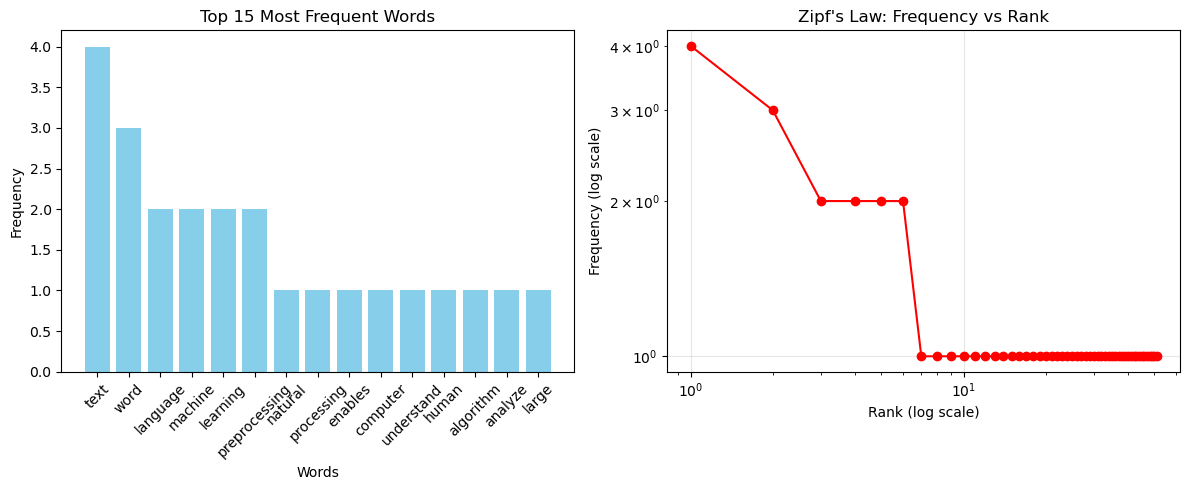


📋 Detailed Corpus Statistics:
• Average word length: 7.70 characters
• Longest word: 'representation' (14 chars)
• Shortest word: 'nlp' (3 chars)

📊 Distribution of word frequencies:
  1 words appear 4 time(s)
  1 words appear 3 time(s)
  4 words appear 2 time(s)

🎯 Frequency analysis reveals the most important words in our corpus!


In [ ]:
# Frequency distribution analysis with a larger text
# Let's create a sample dataset combining multiple texts
texts = [
    "Natural language processing enables computers to understand human language.",
    "Machine learning algorithms can analyze large amounts of text data efficiently.", 
    "Text preprocessing is crucial for successful NLP applications.",
    "Tokenization, stemming, and lemmatization are fundamental preprocessing steps.",
    "Frequency distributions help identify the most important words in a corpus.",
    "Stop words removal reduces noise and improves text analysis quality.",
    "Regular expressions provide powerful pattern matching capabilities.",
    "Word vectorization converts text into numerical representations for machine learning."
]

# Combine all texts
combined_text = " ".join(texts) # Combine all text into a single string via whitespace.
print("📚 Combined text corpus:")
print(combined_text)
print("\n" + "="*70)

# Process the text
def process_text_for_analysis(text):
    """Complete text processing pipeline"""
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stop words
    stop_words_punct = set(stopwords.words('english')).union(set(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words_punct]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return processed_tokens

processed_tokens = process_text_for_analysis(combined_text)
print(f"🔄 Processed tokens ({len(processed_tokens)}):")
print(processed_tokens)
print("\n" + "-"*70)

# Create frequency distribution
freq_dist = FreqDist(processed_tokens)

print("📊 Frequency Distribution Analysis:")
print(f"• Total tokens: {len(processed_tokens)}")
print(f"• Unique words (vocabulary): {len(freq_dist)}")
print(f"• Type-Token Ratio: {len(freq_dist)/len(processed_tokens):.3f}") #

print(f"\n🔝 Top 10 most frequent words:")
for word, frequency in freq_dist.most_common(10):
    print(f"  {word:15} : {frequency:2d} ({frequency/len(processed_tokens)*100:.1f}%)")

print(f"\n📈 Frequency distribution statistics:")
print(f"• Most common word: '{freq_dist.max()}' ({freq_dist[freq_dist.max()]} times)")
print(f"• Words appearing only once: {len([word for word in freq_dist if freq_dist[word] == 1])}")

# Visualize frequency distribution
plt.figure(figsize=(12, 5))

# Plot 1: Top 15 words
plt.subplot(1, 2, 1)
top_words = freq_dist.most_common(15)
words, frequencies = zip(*top_words)
plt.bar(range(len(words)), frequencies, color='skyblue')
plt.title('Top 15 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(range(len(words)), words, rotation=45)

# Plot 2: Frequency distribution (Zipf's law)
plt.subplot(1, 2, 2)
all_frequencies = sorted(freq_dist.values(), reverse=True)
ranks = range(1, len(all_frequencies) + 1)
plt.loglog(ranks, all_frequencies, marker='o', color='red')
plt.title('Zipf\'s Law: Frequency vs Rank')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\n📋 Detailed Corpus Statistics:")
print(f"• Average word length: {sum(len(word) for word in processed_tokens)/len(processed_tokens):.2f} characters")
print(f"• Longest word: '{max(processed_tokens, key=len)}' ({len(max(processed_tokens, key=len))} chars)")
print(f"• Shortest word: '{min(processed_tokens, key=len)}' ({len(min(processed_tokens, key=len))} chars)")

# Words by frequency
freq_counts = Counter(freq_dist.values())
print(f"\n📊 Distribution of word frequencies:")
for freq, count in sorted(freq_counts.items(), reverse=True):
    if freq > 1:  # Only show words that appear more than once
        print(f"  {count} words appear {freq} time(s)")

print(f"\n🎯 Frequency analysis reveals the most important words in our corpus!")

## Understanding Type-Token Ratio (TTR)

The **Type-Token Ratio (TTR)** is a measure of **vocabulary richness** or **lexical diversity** in a text.

### **Formula**: 
```
TTR = Number of Unique Words (Types) / Total Number of Words (Tokens)
```

### **Components:**
- **Types**: Unique words in the text (vocabulary size)
- **Tokens**: Total word count including repetitions

### **In the code above:**
```python
print(f"• Type-Token Ratio: {len(freq_dist)/len(processed_tokens):.3f}")
```

- `len(freq_dist)` = **Number of unique words** (types)
- `len(processed_tokens)` = **Total word count** (tokens)
- `:.3f` = **Format to 3 decimal places**

## **What TTR Values Mean:**

| TTR Value | Vocabulary Diversity | Example Text Types |
|-----------|---------------------|-------------------|
| **High (0.7-1.0)** | Rich vocabulary, little repetition | Academic papers, literature |
| **Medium (0.4-0.7)** | Moderate vocabulary diversity | News articles, blogs |
| **Low (0.1-0.4)** | Limited vocabulary, lots of repetition | Simple texts, repetitive content |

## **Practical Examples:**

**Text A**: "The cat sat on the mat"
- Types: {the, cat, sat, on, mat} = 5 unique words
- Tokens: 6 total words
- TTR: 5/6 = **0.833** (high diversity)

**Text B**: "The the the cat cat sat"  
- Types: {the, cat, sat} = 3 unique words
- Tokens: 6 total words
- TTR: 3/6 = **0.500** (medium diversity)

## **Why TTR Matters:**
- 📚 **Text Complexity**: Higher TTR often indicates more sophisticated writing
- 🎯 **Content Analysis**: Helps identify writing style and vocabulary level
- 📊 **Comparative Analysis**: Compare vocabulary richness across different texts
- 🔍 **Quality Assessment**: Detect repetitive or diverse content

**💡 In essence, TTR answers: "How varied is the vocabulary in this text?"**

# 9. N-grams and Bigrams


**N-grams** are contiguous sequences of n items (words, characters, or tokens) from text. They capture local context and word relationships.

## Types of N-grams:
- **Unigrams (1-gram)**: Individual words → `["natural", "language", "processing"]`
- **Bigrams (2-gram)**: Word pairs → `[("natural", "language"), ("language", "processing")]`
- **Trigrams (3-gram)**: Three words → `[("natural", "language", "processing")]`
- **N-grams**: Any length sequence

## Applications:
- 🔍 **Language Modeling**: Predicting next words
- 🎯 **Feature Engineering**: Creating better text features  
- 📊 **Collocation Analysis**: Finding word associations
- 🔗 **Context Understanding**: Capturing phrase meanings

## Mutual Information:
Measures how much information two words share when they appear together vs. independently.

Let's explore n-grams and their analysis!

📚 Extended corpus processed: 69 tokens
🔤 Sample tokens: ['natural', 'language', 'processing', 'fascinating', 'field', 'artificial', 'intelligence', 'machine', 'learning', 'algorithm', 'enable', 'computer', 'understand', 'human', 'language']...

🔍 N-gram Analysis:
📝 Unigrams: 69 total
   Sample: ['natural', 'language', 'processing', 'fascinating', 'field', 'artificial', 'intelligence', 'machine']

🔗 Bigrams: 68 total
   Sample: [('natural', 'language'), ('language', 'processing'), ('processing', 'fascinating'), ('fascinating', 'field'), ('field', 'artificial')]

🔗🔗 Trigrams: 67 total
   Sample: [('natural', 'language', 'processing'), ('language', 'processing', 'fascinating'), ('processing', 'fascinating', 'field'), ('fascinating', 'field', 'artificial'), ('field', 'artificial', 'intelligence')]

🔗🔗🔗 4-grams: 66 total
   Sample: [('natural', 'language', 'processing', 'fascinating'), ('language', 'processing', 'fascinating', 'field'), ('processing', 'fascinating', 'field', 'artificial')]


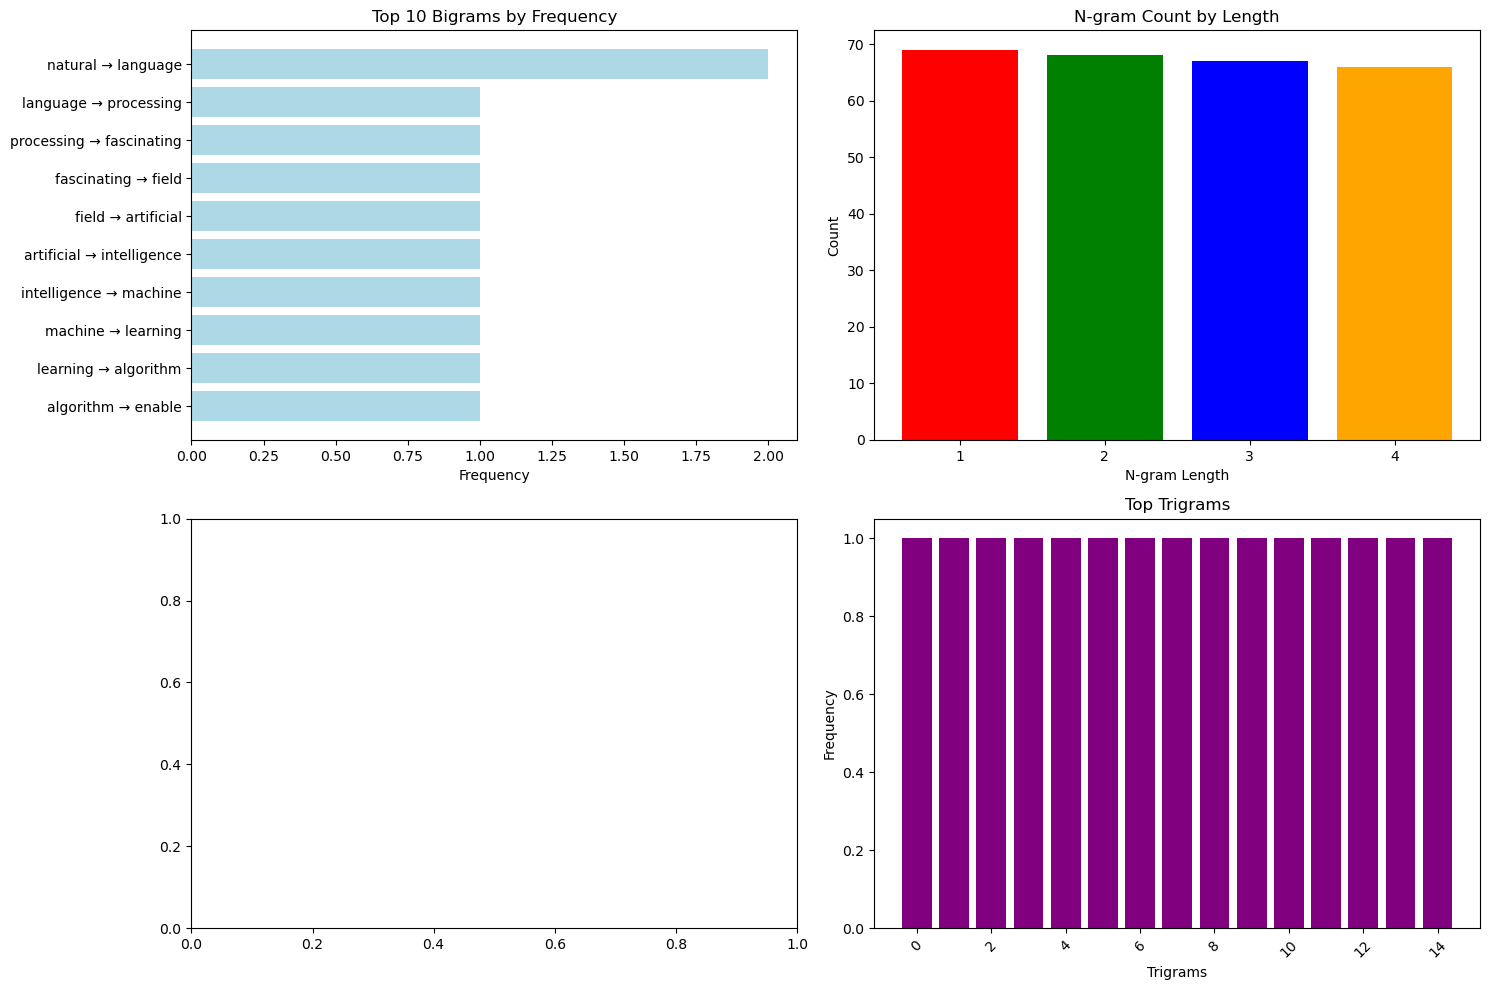


🎯 Key N-gram Insights:
• Most common bigram: 'natural → language'
• Highest PMI bigram: 'natural → language' (score: 4.524)
• Total unique bigrams: 67
• N-grams help capture context and relationships between words!

🔍 Meaningful Collocations (word associations):
   1. natural + language

✨ N-grams reveal hidden patterns in text structure!


In [56]:
# N-grams analysis implementation
# Extended corpus for better n-gram analysis
extended_corpus = """
Natural language processing is a fascinating field of artificial intelligence.
Machine learning algorithms enable computers to understand human language patterns.
Deep learning models like transformers have revolutionized natural language understanding.
Text preprocessing techniques include tokenization, stemming, and lemmatization processes.
Feature engineering for text data involves creating meaningful representations from raw text.
Word embeddings capture semantic relationships between words in high-dimensional spaces.
Named entity recognition identifies people, places, and organizations in text documents.
Sentiment analysis determines emotional tone and opinions expressed in written text.
"""

# Process the text
extended_tokens = process_text_for_analysis(extended_corpus)
print(f"📚 Extended corpus processed: {len(extended_tokens)} tokens")
print(f"🔤 Sample tokens: {extended_tokens[:15]}...")
print("\n" + "="*70)

# Generate different types of n-grams
print("🔍 N-gram Analysis:")

# Unigrams (already have these)
unigrams = extended_tokens
print(f"📝 Unigrams: {len(unigrams)} total")
print(f"   Sample: {unigrams[:8]}")

# Bigrams
text_bigrams = list(bigrams(extended_tokens))
print(f"\n🔗 Bigrams: {len(text_bigrams)} total")
print(f"   Sample: {text_bigrams[:5]}")

# Trigrams  
text_trigrams = list(trigrams(extended_tokens))
print(f"\n🔗🔗 Trigrams: {len(text_trigrams)} total")
print(f"   Sample: {text_trigrams[:5]}")

# 4-grams
text_4grams = list(ngrams(extended_tokens, 4))
print(f"\n🔗🔗🔗 4-grams: {len(text_4grams)} total")
print(f"   Sample: {text_4grams[:3]}")

# Analyze bigram frequencies
print("\n📊 Bigram Frequency Analysis:")
bigram_freq = FreqDist(text_bigrams)
print(f"🔝 Top 10 most common bigrams:")
for bigram, frequency in bigram_freq.most_common(10):
    print(f"   {' → '.join(bigram):25}: {frequency}")

# Mutual Information Analysis
print("\n🧮 Mutual Information Analysis:")
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(extended_tokens)

# Apply frequency filter (minimum 2 occurrences)
finder.apply_freq_filter(2)

print("🎯 Top bigrams by Pointwise Mutual Information (PMI):")
pmi_scores = finder.score_ngrams(bigram_measures.pmi)
for bigram, score in pmi_scores[:10]:
    print(f"   {' → '.join(bigram):25}: {score:.3f}")

# Visualize bigram network (showing relationships)
print("\n📈 Visualizing N-gram Statistics:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Bigram frequencies
top_bigrams = bigram_freq.most_common(10)
bigram_labels = [' → '.join(bg) for bg, _ in top_bigrams]
bigram_counts = [count for _, count in top_bigrams]

axes[0, 0].barh(range(len(bigram_labels)), bigram_counts, color='lightblue')
axes[0, 0].set_yticks(range(len(bigram_labels)))
axes[0, 0].set_yticklabels(bigram_labels)
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_title('Top 10 Bigrams by Frequency')
axes[0, 0].invert_yaxis()

# Plot 2: N-gram length distribution
ngram_lengths = [1, 2, 3, 4]
ngram_counts = [len(unigrams), len(text_bigrams), len(text_trigrams), len(text_4grams)]

axes[0, 1].bar(ngram_lengths, ngram_counts, color=['red', 'green', 'blue', 'orange'])
axes[0, 1].set_xlabel('N-gram Length')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('N-gram Count by Length')
axes[0, 1].set_xticks(ngram_lengths)

# Plot 3: PMI scores
if len(pmi_scores) >= 8:
    top_pmi = pmi_scores[:8]
    pmi_labels = [' → '.join(bg) for bg, _ in top_pmi]
    pmi_values = [score for _, score in top_pmi]
    
    axes[1, 0].barh(range(len(pmi_labels)), pmi_values, color='lightgreen')
    axes[1, 0].set_yticks(range(len(pmi_labels)))
    axes[1, 0].set_yticklabels(pmi_labels)
    axes[1, 0].set_xlabel('PMI Score')
    axes[1, 0].set_title('Top Bigrams by PMI Score')
    axes[1, 0].invert_yaxis()

# Plot 4: Trigram word cloud visualization
trigram_text = ' '.join(['_'.join(tg) for tg in text_trigrams])
trigram_freq = FreqDist(text_trigrams)
top_trigrams = dict(trigram_freq.most_common(15))

# Simple visualization of trigrams
trigram_labels = ['_'.join(tg) for tg in top_trigrams.keys()]
trigram_counts = list(top_trigrams.values())

if len(trigram_labels) > 0:
    axes[1, 1].bar(range(len(trigram_labels)), trigram_counts, color='purple')
    axes[1, 1].set_xlabel('Trigrams')
    axes[1, 1].set_ylabel('Frequency') 
    axes[1, 1].set_title('Top Trigrams')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n🎯 Key N-gram Insights:")
print(f"• Most common bigram: '{' → '.join(bigram_freq.max())}'")
print(f"• Highest PMI bigram: '{' → '.join(pmi_scores[0][0])}' (score: {pmi_scores[0][1]:.3f})")
print(f"• Total unique bigrams: {len(bigram_freq)}")
print(f"• N-grams help capture context and relationships between words!")

# Practical application: Find collocations (meaningful word pairs)
print(f"\n🔍 Meaningful Collocations (word associations):")
collocations = finder.nbest(bigram_measures.pmi, 8)
for i, collocation in enumerate(collocations, 1):
    print(f"   {i}. {' + '.join(collocation)}")

print(f"\n✨ N-grams reveal hidden patterns in text structure!")

# 10. Word Vectorization Techniques

![Word Vectorization](https://miro.medium.com/max/1400/1*sXNXYfAqfLUeiDXPCo130w.png)

**Word Vectorization** converts text into numerical vectors that machine learning algorithms can process. It's the bridge between human language and mathematical computation.

## Why Vectorization?
- 🤖 **Machine Learning**: Algorithms need numbers, not words
- 📊 **Mathematical Operations**: Enable similarity calculations
- 🎯 **Feature Engineering**: Create meaningful text representations
- 📈 **Scalability**: Process large text collections efficiently

## Common Approaches:

### 1. **Bag of Words (BoW)**
**Concept**: Imagine dumping all words from a document into a bag - you know what words are there and how many times each appears, but you lose the order.

**How it works**:
- Collect all unique words from your entire dataset (this becomes your "vocabulary")
- For each document, count how many times each vocabulary word appears
- Create a vector where each position represents a word from the vocabulary

**Example**: 
- Document 1: "I love cats" → [1, 1, 1] (for vocabulary: [I, love, cats])
- Document 2: "I love dogs" → [1, 1, 0] (cats=0, dogs would be position 4)

**Pros**: Simple and intuitive
**Cons**: Ignores word order and context

### 2. **Count Vectorization**  
**Concept**: This is essentially the mathematical implementation of Bag of Words - it counts word frequencies.

**How it works**:
- Same as BoW but implemented as a sparse matrix (saves memory)
- Each cell contains the raw count of how many times a word appears in a document
- Results in a document-term matrix

**Example**:
```
Document: "the cat sat on the mat"
Vector: [2, 1, 1, 1, 1] (for vocab: [the, cat, sat, on, mat])
```

**Use case**: Good baseline for text classification and when word frequency matters

### 3. **TF-IDF (Term Frequency-Inverse Document Frequency)**
**Concept**: Not all words are equally important. TF-IDF gives higher weight to words that are frequent in a document BUT rare across the entire collection.

**How it works**:
- **TF (Term Frequency)**: How often a word appears in a document
- **IDF (Inverse Document Frequency)**: How rare a word is across all documents
- **TF-IDF = TF × IDF**: Multiply these together

**Why it's better**:
- Common words like "the", "and" get low scores (appear in many documents)
- Unique, descriptive words get high scores (appear in few documents)
- Helps identify what makes each document distinctive

**Example**:
- Word "Python" in a programming document = HIGH TF-IDF (specific topic)
- Word "the" in any document = LOW TF-IDF (appears everywhere)

**Use case**: Better for document similarity and search engines

Let's implement these vectorization techniques!

# 11. Count Vectorization Implementation

Count Vectorization creates a document-term matrix where each row represents a document and each column represents a word from the vocabulary.

📚 Sample Documents:
1. Natural language processing is fascinating and powerful
2. Machine learning algorithms process large amounts of data
3. Text preprocessing techniques improve analysis quality
4. Word vectorization converts text into numerical representations
5. Feature engineering creates meaningful representations from raw text data
6. Natural language understanding enables intelligent text processing applications

🔢 Count Vectorization Results:
• Number of documents: 6
• Vocabulary size: 20
• Matrix sparsity: 24.2% non-zero

📝 Vocabulary (features):
   0. algorithms
   1. data
   2. language
   3. meaningful representations
   4. natural
   5. natural language
   6. numerical
   7. numerical representations
   8. powerful
   9. preprocessing
  10. preprocessing techniques
  11. process
  12. process large
  13. processing
  14. processing applications
  15. processing fascinating
  16. raw
  17. raw text
  18. representations
  19. text

📊 Document-Term Matrix:
       algorithm

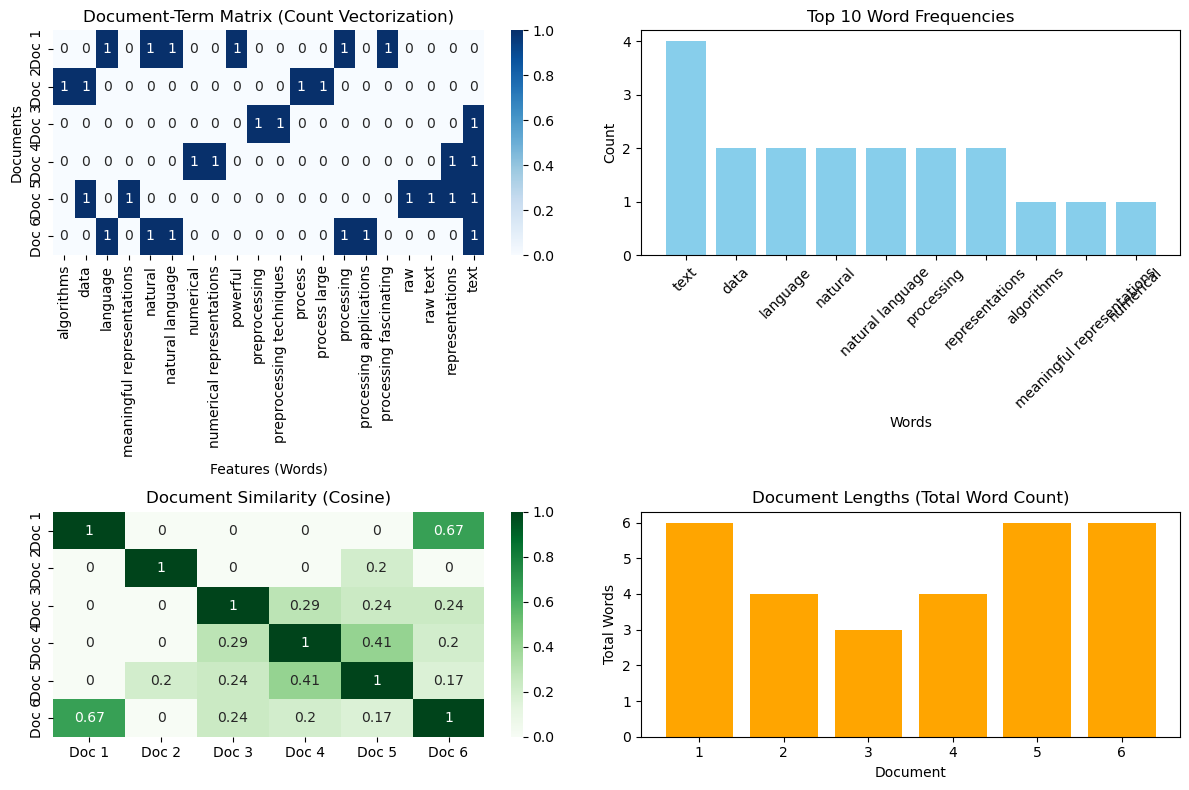


🎯 Key Insights:
• Count vectorization creates sparse matrices (mostly zeros)
• Each document becomes a vector in 20-dimensional space
• Word order is lost, but word frequency is preserved
• Similar documents have higher cosine similarity scores

⚡ Vector Operations:
• Similarity between Doc 1 and Doc 2: 0.000
• Doc 1 vector sample: [0 0 1 0 1 1 0 0]...
• Doc 2 vector sample: [1 1 0 0 0 0 0 0]...

✅ Count vectorization successfully converts text to numerical vectors!


In [ ]:
# Count Vectorization Implementation
# Sample documents for vectorization
documents = [
    "Natural language processing is fascinating and powerful",
    "Machine learning algorithms process large amounts of data",  
    "Text preprocessing techniques improve analysis quality",
    "Word vectorization converts text into numerical representations",
    "Feature engineering creates meaningful representations from raw text data",
    "Natural language understanding enables intelligent text processing applications"
]

print("📚 Sample Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

print("\n" + "="*70)

# Initialize Count Vectorizer
count_vectorizer = CountVectorizer(
    lowercase=True,           # Convert to lowercase
    stop_words='english',     # Remove English stop words
    max_features=20,          # Limit vocabulary size
    ngram_range=(1, 2)        # Include unigrams and bigrams
)

# Fit and transform documents
count_matrix = count_vectorizer.fit_transform(documents) #  
feature_names = count_vectorizer.get_feature_names_out()

print("🔢 Count Vectorization Results:")
print(f"• Number of documents: {count_matrix.shape[0]}")
print(f"• Vocabulary size: {count_matrix.shape[1]}")
print(f"• Matrix sparsity: {(count_matrix.nnz / count_matrix.shape[0] / count_matrix.shape[1] * 100):.1f}% non-zero")

# Display feature names (vocabulary)
print(f"\n📝 Vocabulary (features):")
for i, feature in enumerate(feature_names):
    print(f"  {i:2d}. {feature}")

# Convert sparse matrix to dense for display
count_dense = count_matrix.toarray()

# Create DataFrame for better visualization
count_df = pd.DataFrame(count_dense, columns=feature_names, 
                       index=[f"Doc {i+1}" for i in range(len(documents))])

print(f"\n📊 Document-Term Matrix:")
print(count_df)

# Analyze the results
print(f"\n🔍 Analysis:")
print(f"• Total word occurrences: {count_matrix.sum()}")
print(f"• Most common words across all documents:")

# Sum word counts across all documents
word_counts = count_matrix.sum(axis=0).A1  # .A1 converts matrix to 1D array
word_freq_pairs = [(feature_names[i], word_counts[i]) for i in range(len(feature_names))]
word_freq_pairs.sort(key=lambda x: x[1], reverse=True)

for word, count in word_freq_pairs[:8]:
    print(f"   • '{word}': {count} times")

# Visualize count matrix
plt.figure(figsize=(12, 8))

# Heatmap of document-term matrix
plt.subplot(2, 2, 1)
sns.heatmap(count_df, annot=True, cmap='Blues', fmt='d')
plt.title('Document-Term Matrix (Count Vectorization)')
plt.xlabel('Features (Words)')
plt.ylabel('Documents')

# Word frequency bar chart
plt.subplot(2, 2, 2)
words, counts = zip(*word_freq_pairs[:10])
plt.bar(range(len(words)), counts, color='skyblue')
plt.title('Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(range(len(words)), words, rotation=45)

# Document similarity heatmap (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity
doc_similarity = cosine_similarity(count_matrix)

plt.subplot(2, 2, 3)
sns.heatmap(doc_similarity, annot=True, cmap='Greens', 
           xticklabels=[f'Doc {i+1}' for i in range(len(documents))],
           yticklabels=[f'Doc {i+1}' for i in range(len(documents))])
plt.title('Document Similarity (Cosine)')

# Document length comparison
doc_lengths = count_matrix.sum(axis=1).A1
plt.subplot(2, 2, 4)
plt.bar(range(1, len(documents)+1), doc_lengths, color='orange')
plt.title('Document Lengths (Total Word Count)')
plt.xlabel('Document')
plt.ylabel('Total Words')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Insights:")
print(f"• Count vectorization creates sparse matrices (mostly zeros)")
print(f"• Each document becomes a vector in {len(feature_names)}-dimensional space")
print(f"• Word order is lost, but word frequency is preserved")
print(f"• Similar documents have higher cosine similarity scores")

# Demonstrate vector operations
print(f"\n⚡ Vector Operations:")
doc1_vector = count_matrix[0].toarray().flatten()
doc2_vector = count_matrix[1].toarray().flatten()

similarity = cosine_similarity([doc1_vector], [doc2_vector])[0][0]
print(f"• Similarity between Doc 1 and Doc 2: {similarity:.3f}")
print(f"• Doc 1 vector sample: {doc1_vector[:8]}...")
print(f"• Doc 2 vector sample: {doc2_vector[:8]}...")

print(f"\n✅ Count vectorization successfully converts text to numerical vectors!")

# 12. TF-IDF Vectorization Implementation

![TF-IDF Formula](https://miro.medium.com/max/1400/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

**TF-IDF (Term Frequency-Inverse Document Frequency)** weights words based on their importance across the entire corpus.

## Formula Components:

### Term Frequency (TF):
```
TF(t,d) = (Number of times term t appears in document d) / (Total number of terms in document d)
```

### Inverse Document Frequency (IDF):
```  
IDF(t) = log(Total number of documents / Number of documents containing term t)
```

### TF-IDF Score:
```
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

## Key Benefits:
- **Balances Frequency**: High TF for important terms in document
- **Reduces Common Words**: High IDF for rare, distinctive terms  
- **Document Discrimination**: Highlights what makes each document unique

📚 Documents for TF-IDF Analysis:
1. Natural language processing is fascinating and powerful
2. Machine learning algorithms process large amounts of data
3. Text preprocessing techniques improve analysis quality
4. Word vectorization converts text into numerical representations
5. Feature engineering creates meaningful representations from raw text data
6. Natural language understanding enables intelligent text processing applications

📊 TF-IDF Vectorization Results:
• Number of documents: 6
• Vocabulary size: 20
• Matrix sparsity: 24.2% non-zero

📋 TF-IDF Matrix (top values only):

Doc 1:
  • powerful            : 0.462
  • processing fascinating: 0.462
  • language            : 0.379
  • natural             : 0.379
  • natural language    : 0.379

Doc 2:
  • algorithms          : 0.522
  • process             : 0.522
  • process large       : 0.522
  • data                : 0.428

Doc 3:
  • preprocessing       : 0.652
  • preprocessing techniques: 0.652
  • text                : 0.38

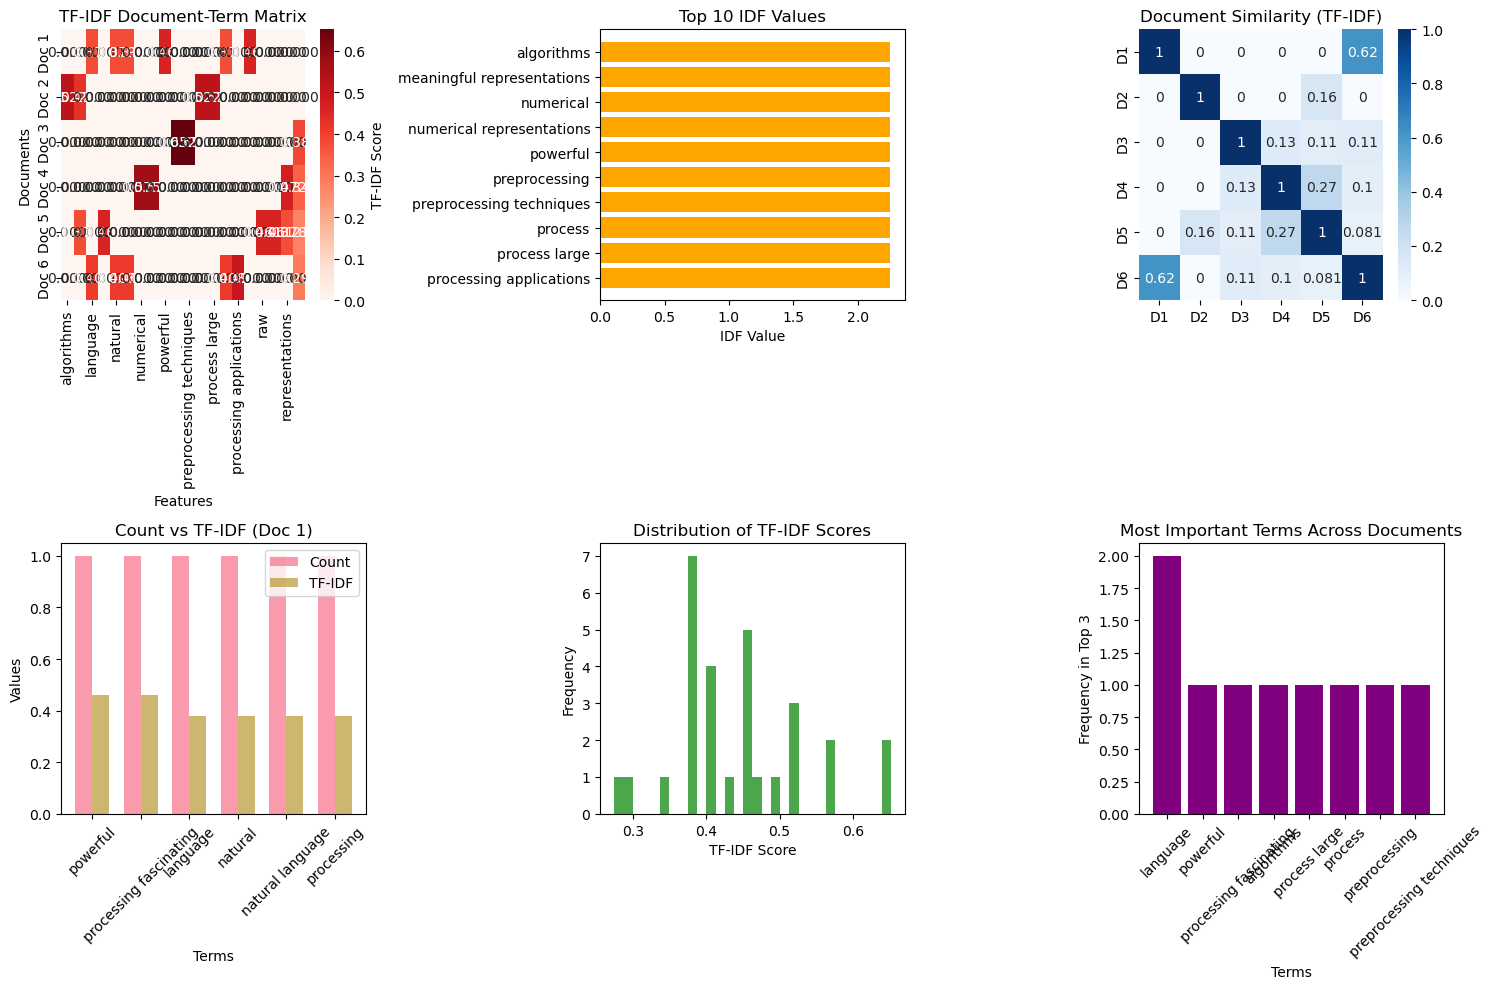


🎯 TF-IDF Key Insights:
• TF-IDF scores are typically between 0 and 1
• Higher scores indicate more important/distinctive terms
• Common words get lower scores due to high document frequency
• Rare but relevant words get higher scores

🔄 Similarity Comparison (Doc 1 vs Doc 2):
• Count Vectorization similarity: 0.000
• TF-IDF similarity: 0.000
• Difference: 0.000

✅ TF-IDF provides more nuanced text representation!
🚀 Ready to move to grammar analysis and advanced NLP techniques!


In [58]:
# TF-IDF Vectorization Implementation
# Using the same documents from count vectorization for comparison
print("📚 Documents for TF-IDF Analysis:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

print("\n" + "="*70)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,           # Convert to lowercase
    stop_words='english',     # Remove English stop words
    max_features=20,          # Limit vocabulary size
    ngram_range=(1, 2),       # Include unigrams and bigrams
    use_idf=True,            # Use inverse document frequency
    smooth_idf=True          # Add smoothing to prevent division by zero
)

# Fit and transform documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("📊 TF-IDF Vectorization Results:")
print(f"• Number of documents: {tfidf_matrix.shape[0]}")
print(f"• Vocabulary size: {tfidf_matrix.shape[1]}")
print(f"• Matrix sparsity: {(tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]) * 100):.1f}% non-zero")

# Convert to dense matrix for display
tfidf_dense = tfidf_matrix.toarray()

# Create DataFrame
tfidf_df = pd.DataFrame(tfidf_dense, columns=tfidf_feature_names,
                       index=[f"Doc {i+1}" for i in range(len(documents))])

print(f"\n📋 TF-IDF Matrix (top values only):")
# Show only non-zero values for clarity
for doc_idx, doc_name in enumerate(tfidf_df.index):
    print(f"\n{doc_name}:")
    doc_scores = tfidf_df.loc[doc_name]
    top_scores = doc_scores.nlargest(5)
    for term, score in top_scores.items():
        if score > 0:
            print(f"  • {term:20}: {score:.3f}")

# Compare Count vs TF-IDF for same document
print(f"\n🔍 Comparison: Count vs TF-IDF for Document 1")
print("-" * 50)
doc1_count = count_df.loc["Doc 1"]
doc1_tfidf = tfidf_df.loc["Doc 1"]

comparison_data = []
for term in tfidf_feature_names:
    if term in count_df.columns:
        count_val = doc1_count[term]
        tfidf_val = doc1_tfidf[term]
        if count_val > 0 or tfidf_val > 0:
            comparison_data.append((term, count_val, tfidf_val))

comparison_data.sort(key=lambda x: x[2], reverse=True)  # Sort by TF-IDF score

print(f"{'Term':<20} {'Count':<8} {'TF-IDF':<8}")
print("-" * 40)
for term, count_val, tfidf_val in comparison_data[:8]:
    print(f"{term:<20} {count_val:<8} {tfidf_val:<8.3f}")

# Calculate IDF values for interpretation
print(f"\n📈 IDF Values (higher = rarer words):")
idf_values = tfidf_vectorizer.idf_
idf_dict = dict(zip(tfidf_feature_names, idf_values))
sorted_idf = sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)

for term, idf in sorted_idf[:8]:
    print(f"  • {term:20}: {idf:.3f} (appears in {np.exp(idf):.1f} documents)")

# Visualize TF-IDF results
plt.figure(figsize=(15, 10))

# Plot 1: TF-IDF Heatmap
plt.subplot(2, 3, 1)
sns.heatmap(tfidf_df, annot=True, cmap='Reds', fmt='.3f', cbar_kws={'label': 'TF-IDF Score'})
plt.title('TF-IDF Document-Term Matrix')
plt.xlabel('Features')
plt.ylabel('Documents')

# Plot 2: IDF Values
plt.subplot(2, 3, 2)
terms, idf_vals = zip(*sorted_idf[:10])
plt.barh(range(len(terms)), idf_vals, color='orange')
plt.yticks(range(len(terms)), terms)
plt.xlabel('IDF Value')
plt.title('Top 10 IDF Values')
plt.gca().invert_yaxis()

# Plot 3: Document Similarity (TF-IDF)
tfidf_similarity = cosine_similarity(tfidf_matrix)
plt.subplot(2, 3, 3)
sns.heatmap(tfidf_similarity, annot=True, cmap='Blues',
           xticklabels=[f'D{i+1}' for i in range(len(documents))],
           yticklabels=[f'D{i+1}' for i in range(len(documents))])
plt.title('Document Similarity (TF-IDF)')

# Plot 4: Count vs TF-IDF comparison for Doc 1
plt.subplot(2, 3, 4)
terms_comp, counts_comp, tfidf_comp = zip(*comparison_data[:8])
x = np.arange(len(terms_comp))
width = 0.35

plt.bar(x - width/2, counts_comp, width, label='Count', alpha=0.7)
plt.bar(x + width/2, tfidf_comp, width, label='TF-IDF', alpha=0.7)
plt.xlabel('Terms')
plt.ylabel('Values')
plt.title('Count vs TF-IDF (Doc 1)')
plt.xticks(x, terms_comp, rotation=45)
plt.legend()

# Plot 5: TF-IDF distribution
plt.subplot(2, 3, 5)
all_tfidf_values = tfidf_matrix.data  # Get all non-zero values
plt.hist(all_tfidf_values, bins=30, alpha=0.7, color='green')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.title('Distribution of TF-IDF Scores')

# Plot 6: Top terms per document
plt.subplot(2, 3, 6)
doc_top_terms = []
for i in range(len(documents)):
    doc_vector = tfidf_matrix[i].toarray().flatten()
    top_indices = doc_vector.argsort()[-3:][::-1]  # Top 3 terms
    top_terms = [tfidf_feature_names[idx] for idx in top_indices if doc_vector[idx] > 0]
    doc_top_terms.extend(top_terms)

top_term_counts = Counter(doc_top_terms)
if top_term_counts:
    terms_plot, counts_plot = zip(*top_term_counts.most_common(8))
    plt.bar(range(len(terms_plot)), counts_plot, color='purple')
    plt.xlabel('Terms')
    plt.ylabel('Frequency in Top 3')
    plt.title('Most Important Terms Across Documents')
    plt.xticks(range(len(terms_plot)), terms_plot, rotation=45)

plt.tight_layout()
plt.show()

# Key insights
print(f"\n🎯 TF-IDF Key Insights:")
print(f"• TF-IDF scores are typically between 0 and 1")
print(f"• Higher scores indicate more important/distinctive terms")
print(f"• Common words get lower scores due to high document frequency")
print(f"• Rare but relevant words get higher scores")

# Demonstrate the difference in document similarity
count_sim_12 = cosine_similarity(count_matrix[0], count_matrix[1])[0][0]
tfidf_sim_12 = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

print(f"\n🔄 Similarity Comparison (Doc 1 vs Doc 2):")
print(f"• Count Vectorization similarity: {count_sim_12:.3f}")
print(f"• TF-IDF similarity: {tfidf_sim_12:.3f}")
print(f"• Difference: {abs(count_sim_12 - tfidf_sim_12):.3f}")

print(f"\n✅ TF-IDF provides more nuanced text representation!")
print("🚀 Ready to move to grammar analysis and advanced NLP techniques!")

# 13. Context-Free Grammars and POS Tagging

![Grammar Tree](https://miro.medium.com/max/1400/1*Kl8KdPKhY6Oq8k8Y7nQK-A.png)

**Context-Free Grammars (CFG)** provide formal rules for how sentences can be structured. They're fundamental to:

## Key Concepts:

### Context-Free Grammar:
- **Rules**: Define valid sentence structures (S → NP VP)
- **Terminals**: Actual words in vocabulary  
- **Non-terminals**: Grammatical categories (NP, VP, PP)
- **Recursion**: Rules can reference themselves for complex sentences

### Part-of-Speech (POS) Tagging:
- **Purpose**: Label each word with its grammatical role
- **Categories**: Noun, Verb, Adjective, Adverb, etc.
- **Applications**: Syntax analysis, language generation, feature engineering

## Penn Treebank Tags:
- **NN**: Noun (singular)
- **VB**: Verb (base form)  
- **JJ**: Adjective
- **DT**: Determiner
- **IN**: Preposition

## Why Important:
- 🏗️ **Sentence Structure**: Understanding grammar rules
- 🎯 **Feature Engineering**: POS tags as ML features
- 🤖 **Language Generation**: Creating grammatically correct text
- 🔍 **Information Extraction**: Better entity recognition

🏷️ Part-of-Speech Tagging Examples

📝 Sentence 1: The quick brown fox jumps over the lazy dog
🏷️ POS Tags:
   The          → DT
   quick        → JJ
   brown        → NN
   fox          → NN
   jumps        → VBZ
   over         → IN
   the          → DT
   lazy         → JJ
   dog          → NN

📝 Sentence 2: Natural language processing enables intelligent text analysis
🏷️ POS Tags:
   Natural      → JJ
   language     → NN
   processing   → NN
   enables      → VBZ
   intelligent  → JJ
   text         → NN
   analysis     → NN

📝 Sentence 3: Machine learning algorithms can automatically classify documents
🏷️ POS Tags:
   Machine      → NN
   learning     → VBG
   algorithms   → NNS
   can          → MD
   automatically → RB
   classify     → VB
   documents    → NNS

📝 Sentence 4: She carefully studied the complex grammatical structures
🏷️ POS Tags:
   She          → PRP
   carefully    → RB
   studied      → VBD
   the          → DT
   complex      → JJ
   grammatical  → JJ
   struc

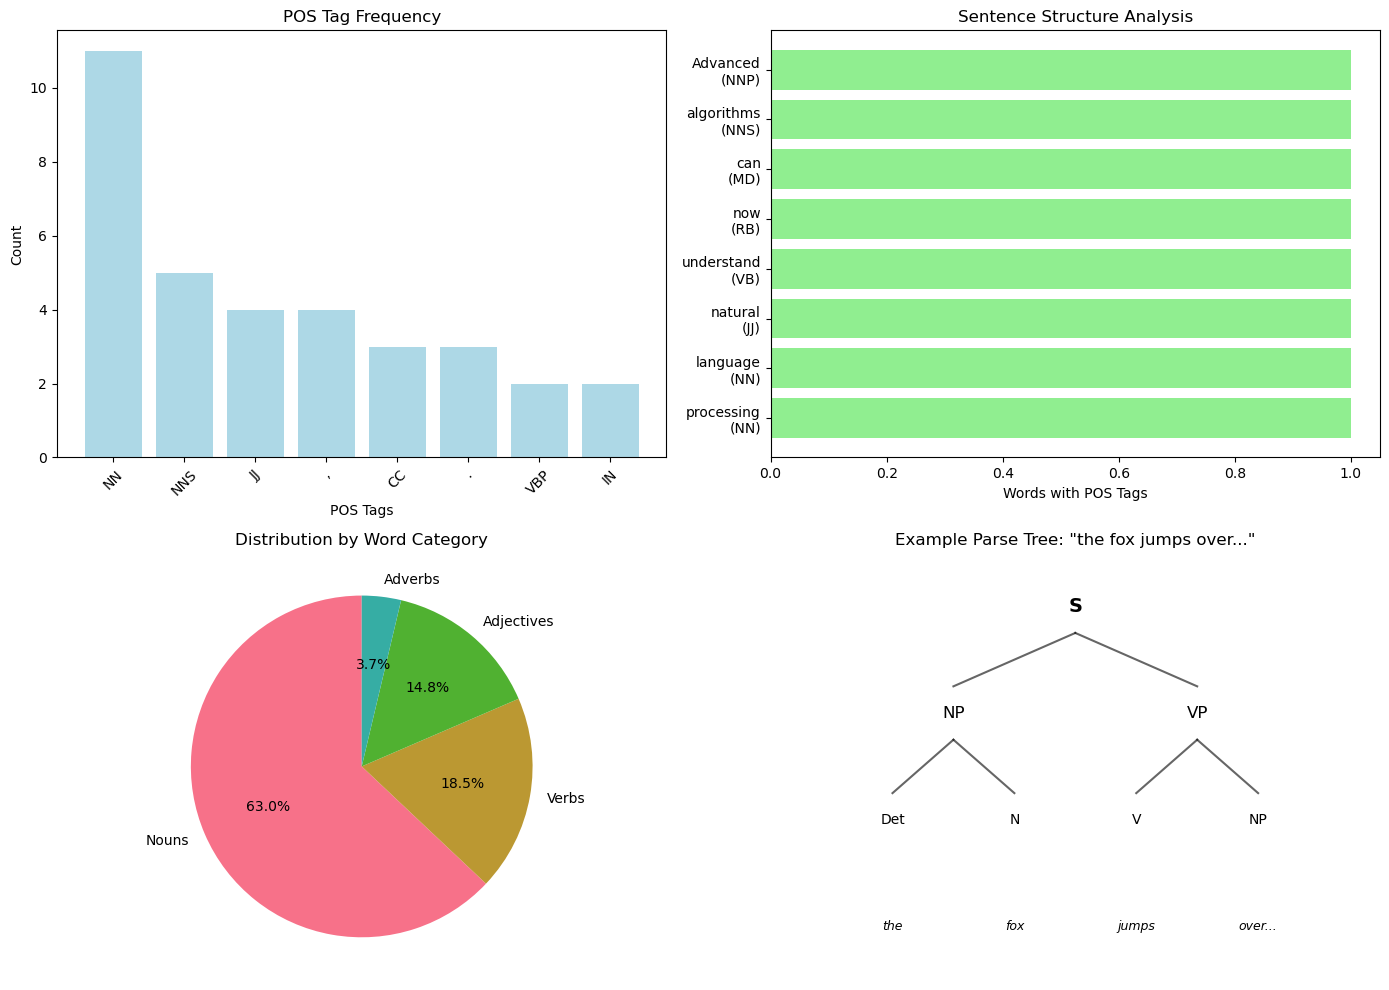


🎯 Key Grammar Insights:
• POS tagging identifies grammatical roles of words
• Context-free grammars define sentence structures
• Most common POS tag: NN (11 times)
• Grammar parsing helps understand sentence structure
• POS tags are valuable features for NLP tasks

✨ Grammar analysis provides structural understanding of language!


In [59]:
# Context-Free Grammars and POS Tagging Implementation

# Part 1: POS Tagging with NLTK
print("🏷️ Part-of-Speech Tagging Examples")
print("="*50)

# Sample sentences for POS tagging
sample_sentences = [
    "The quick brown fox jumps over the lazy dog",
    "Natural language processing enables intelligent text analysis",
    "Machine learning algorithms can automatically classify documents",
    "She carefully studied the complex grammatical structures"
]

for i, sentence in enumerate(sample_sentences, 1):
    print(f"\n📝 Sentence {i}: {sentence}")
    
    # Tokenize and get POS tags
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    
    print("🏷️ POS Tags:")
    for word, tag in pos_tags:
        print(f"   {word:12} → {tag}")

# POS tag explanation
print("\n" + "="*70)
print("📚 Common POS Tag Meanings:")
tag_meanings = {
    'DT': 'Determiner (the, a, an)',
    'JJ': 'Adjective (quick, brown)',
    'NN': 'Noun, singular (fox, dog)',
    'NNS': 'Noun, plural (algorithms)',
    'VBZ': 'Verb, 3rd person singular present (jumps)',
    'VB': 'Verb, base form (study)',
    'VBD': 'Verb, past tense (studied)',
    'IN': 'Preposition (over, of)',
    'RB': 'Adverb (carefully)',
    'PRP': 'Personal pronoun (she)'
}

for tag, meaning in tag_meanings.items():
    print(f"• {tag:4} : {meaning}")

print("\n" + "="*70)

# Part 2: Context-Free Grammar Implementation
print("📝 Context-Free Grammar Implementation")
print("="*50)

# Create a simple grammar for parsing sentences
simple_grammar = CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det Adj N | N | NP PP
    VP -> V NP | V NP PP | V
    Det -> 'the' | 'a' | 'an' | 'my'
    Adj -> 'quick' | 'brown' | 'lazy' | 'intelligent' | 'complex'
    N -> 'fox' | 'dog' | 'cat' | 'processing' | 'analysis' | 'language' | 'machine'
    V -> 'jumps' | 'runs' | 'enables' | 'studies'
    P -> 'over' | 'under' | 'with' | 'of'
""")

print("📖 Grammar Rules:")
for production in simple_grammar.productions():
    print(f"   {production}")

# Create parser
parser = ChartParser(simple_grammar)

# Test sentences
test_sentences = [
    "the fox jumps",
    "a quick brown fox jumps over the lazy dog",
    "the machine enables intelligent analysis"
]

print(f"\n🔍 Parsing Test Sentences:")
for sentence in test_sentences:
    print(f"\n📝 Parsing: '{sentence}'")
    tokens = sentence.split()
    
    try:
        trees = list(parser.parse(tokens))
        if trees:
            print(f"✅ Successfully parsed! Found {len(trees)} parse tree(s)")
            for i, tree in enumerate(trees, 1):
                print(f"   Tree {i}: {tree}")
                # You can also visualize: tree.draw() (requires tkinter)
        else:
            print("❌ Could not parse - sentence doesn't match grammar rules")
    except Exception as e:
        print(f"❌ Parsing error: {e}")

# Part 3: Advanced POS Analysis
print(f"\n" + "="*70)
print("📊 POS Tag Analysis on Extended Text")

# Use our earlier processed corpus
extended_text = """
Artificial intelligence and machine learning have revolutionized natural language processing.
Advanced algorithms can now understand context, analyze sentiment, and generate coherent text.
These technologies enable applications like chatbots, translation systems, and content analysis tools.
"""

# Tokenize and get POS tags
extended_tokens = word_tokenize(extended_text)
extended_pos = pos_tag(extended_tokens)

# Analyze POS distribution
pos_counts = Counter([tag for word, tag in extended_pos])
print(f"\n📈 POS Tag Distribution:")
for tag, count in pos_counts.most_common():
    print(f"   {tag:4} : {count:2d} ({count/len(extended_pos)*100:.1f}%)")

# Extract words by POS category
pos_categories = {
    'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verbs': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjectives': ['JJ', 'JJR', 'JJS'],
    'Adverbs': ['RB', 'RBR', 'RBS']
}

print(f"\n🗂️ Words by Category:")
for category, tags in pos_categories.items():
    words = [word.lower() for word, tag in extended_pos if tag in tags]
    unique_words = list(set(words))
    print(f"{category:12}: {unique_words[:8]}")

# Visualize POS analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: POS tag frequency
top_pos_tags = pos_counts.most_common(8)
tags, tag_counts = zip(*top_pos_tags)
axes[0, 0].bar(tags, tag_counts, color='lightblue')
axes[0, 0].set_title('POS Tag Frequency')
axes[0, 0].set_xlabel('POS Tags')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Sentence structure visualization
sample_sentence = "Advanced algorithms can now understand natural language processing"
sample_tokens = word_tokenize(sample_sentence)
sample_pos = pos_tag(sample_tokens)

words, pos_tags_only = zip(*sample_pos)
y_positions = range(len(words))
axes[0, 1].barh(y_positions, [1]*len(words), color='lightgreen')
axes[0, 1].set_yticks(y_positions)
axes[0, 1].set_yticklabels([f"{word}\n({tag})" for word, tag in sample_pos])
axes[0, 1].set_xlabel('Words with POS Tags')
axes[0, 1].set_title('Sentence Structure Analysis')
axes[0, 1].invert_yaxis()

# Plot 3: POS category distribution  
category_counts = {}
for category, tags in pos_categories.items():
    category_counts[category] = sum(pos_counts[tag] for tag in tags if tag in pos_counts)

if category_counts:
    categories, cat_counts = zip(*category_counts.items())
    axes[1, 0].pie(cat_counts, labels=categories, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Distribution by Word Category')

# Plot 4: Grammar tree visualization (simplified)
# Create a simple parse tree representation
axes[1, 1].text(0.5, 0.9, 'S', ha='center', va='center', fontsize=14, weight='bold')
axes[1, 1].text(0.3, 0.7, 'NP', ha='center', va='center', fontsize=12)
axes[1, 1].text(0.7, 0.7, 'VP', ha='center', va='center', fontsize=12)
axes[1, 1].text(0.2, 0.5, 'Det', ha='center', va='center', fontsize=10)
axes[1, 1].text(0.4, 0.5, 'N', ha='center', va='center', fontsize=10)
axes[1, 1].text(0.6, 0.5, 'V', ha='center', va='center', fontsize=10)
axes[1, 1].text(0.8, 0.5, 'NP', ha='center', va='center', fontsize=10)
axes[1, 1].text(0.2, 0.3, 'the', ha='center', va='center', fontsize=9, style='italic')
axes[1, 1].text(0.4, 0.3, 'fox', ha='center', va='center', fontsize=9, style='italic')
axes[1, 1].text(0.6, 0.3, 'jumps', ha='center', va='center', fontsize=9, style='italic')
axes[1, 1].text(0.8, 0.3, 'over...', ha='center', va='center', fontsize=9, style='italic')

# Draw connections
axes[1, 1].plot([0.5, 0.3], [0.85, 0.75], 'k-', alpha=0.6)
axes[1, 1].plot([0.5, 0.7], [0.85, 0.75], 'k-', alpha=0.6)
axes[1, 1].plot([0.3, 0.2], [0.65, 0.55], 'k-', alpha=0.6)
axes[1, 1].plot([0.3, 0.4], [0.65, 0.55], 'k-', alpha=0.6)
axes[1, 1].plot([0.7, 0.6], [0.65, 0.55], 'k-', alpha=0.6)
axes[1, 1].plot([0.7, 0.8], [0.65, 0.55], 'k-', alpha=0.6)

axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0.2, 1)
axes[1, 1].set_title('Example Parse Tree: "the fox jumps over..."')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Grammar Insights:")
print(f"• POS tagging identifies grammatical roles of words")
print(f"• Context-free grammars define sentence structures") 
print(f"• Most common POS tag: {pos_counts.most_common(1)[0][0]} ({pos_counts.most_common(1)[0][1]} times)")
print(f"• Grammar parsing helps understand sentence structure")
print(f"• POS tags are valuable features for NLP tasks")

print(f"\n✨ Grammar analysis provides structural understanding of language!")

# 14. Feature Engineering for Text Data

![Feature Engineering](https://miro.medium.com/max/1400/1*QFrzSYdbr6EoQGm4jH8jjg.png)

**Feature Engineering** transforms raw text into meaningful numerical features that machine learning algorithms can effectively use. It's the art of creating the right input representation.

## Key Feature Types:

### Statistical Features:
- **Text Length**: Character/word count
- **Vocabulary Richness**: Type-token ratio
- **Readability Scores**: Flesch-Kincaid, etc.
- **Sentence Complexity**: Average sentence length

### Linguistic Features:
- **POS Distributions**: Noun/verb ratios
- **Named Entities**: Person, location, organization counts
- **Syntactic Patterns**: Grammar structure features

### Semantic Features:
- **Word Embeddings**: Dense vector representations
- **Topic Models**: Document themes
- **Sentiment Scores**: Emotional content

## Advanced Techniques:
- 🔢 **Numerical Representations**: TF-IDF, Word2Vec, BERT embeddings
- 📊 **Statistical Measures**: Entropy, perplexity, diversity indices  
- 🎯 **Task-Specific Features**: Domain-relevant characteristics
- 🔗 **Interaction Features**: Combining multiple feature types

📊 Feature Engineering Demonstration
Sample texts for analysis:
1. This is a short and simple sentence with basic vocabulary.
2. The extraordinarily complex and sophisticated natural language processing algori...
3. AI rocks! 🚀 Machine learning is AMAZING!!! Can't wait to explore more NLP techni...
4. The research paper presents a comprehensive analysis of various methodologies em...
5. Quick brown fox jumps. Dog runs fast. Cat sleeps quietly.
6. Natural language processing, machine learning, artificial intelligence, data sci...

🔧 Extracting Features from Sample Texts
------------------------------------------------------------

📝 Text 1: This is a short and simple sentence with basic voc...
   • Words:  10 | Sentences:  1 | TTR: 1.000 | Readability: 61.3

📝 Text 2: The extraordinarily complex and sophisticated natu...
   • Words:  25 | Sentences:  1 | TTR: 0.960 | Readability: -72.3

📝 Text 3: AI rocks! 🚀 Machine learning is AMAZING!!! Can't w...
   • Words:  14 | Sentences:  1 | TTR:

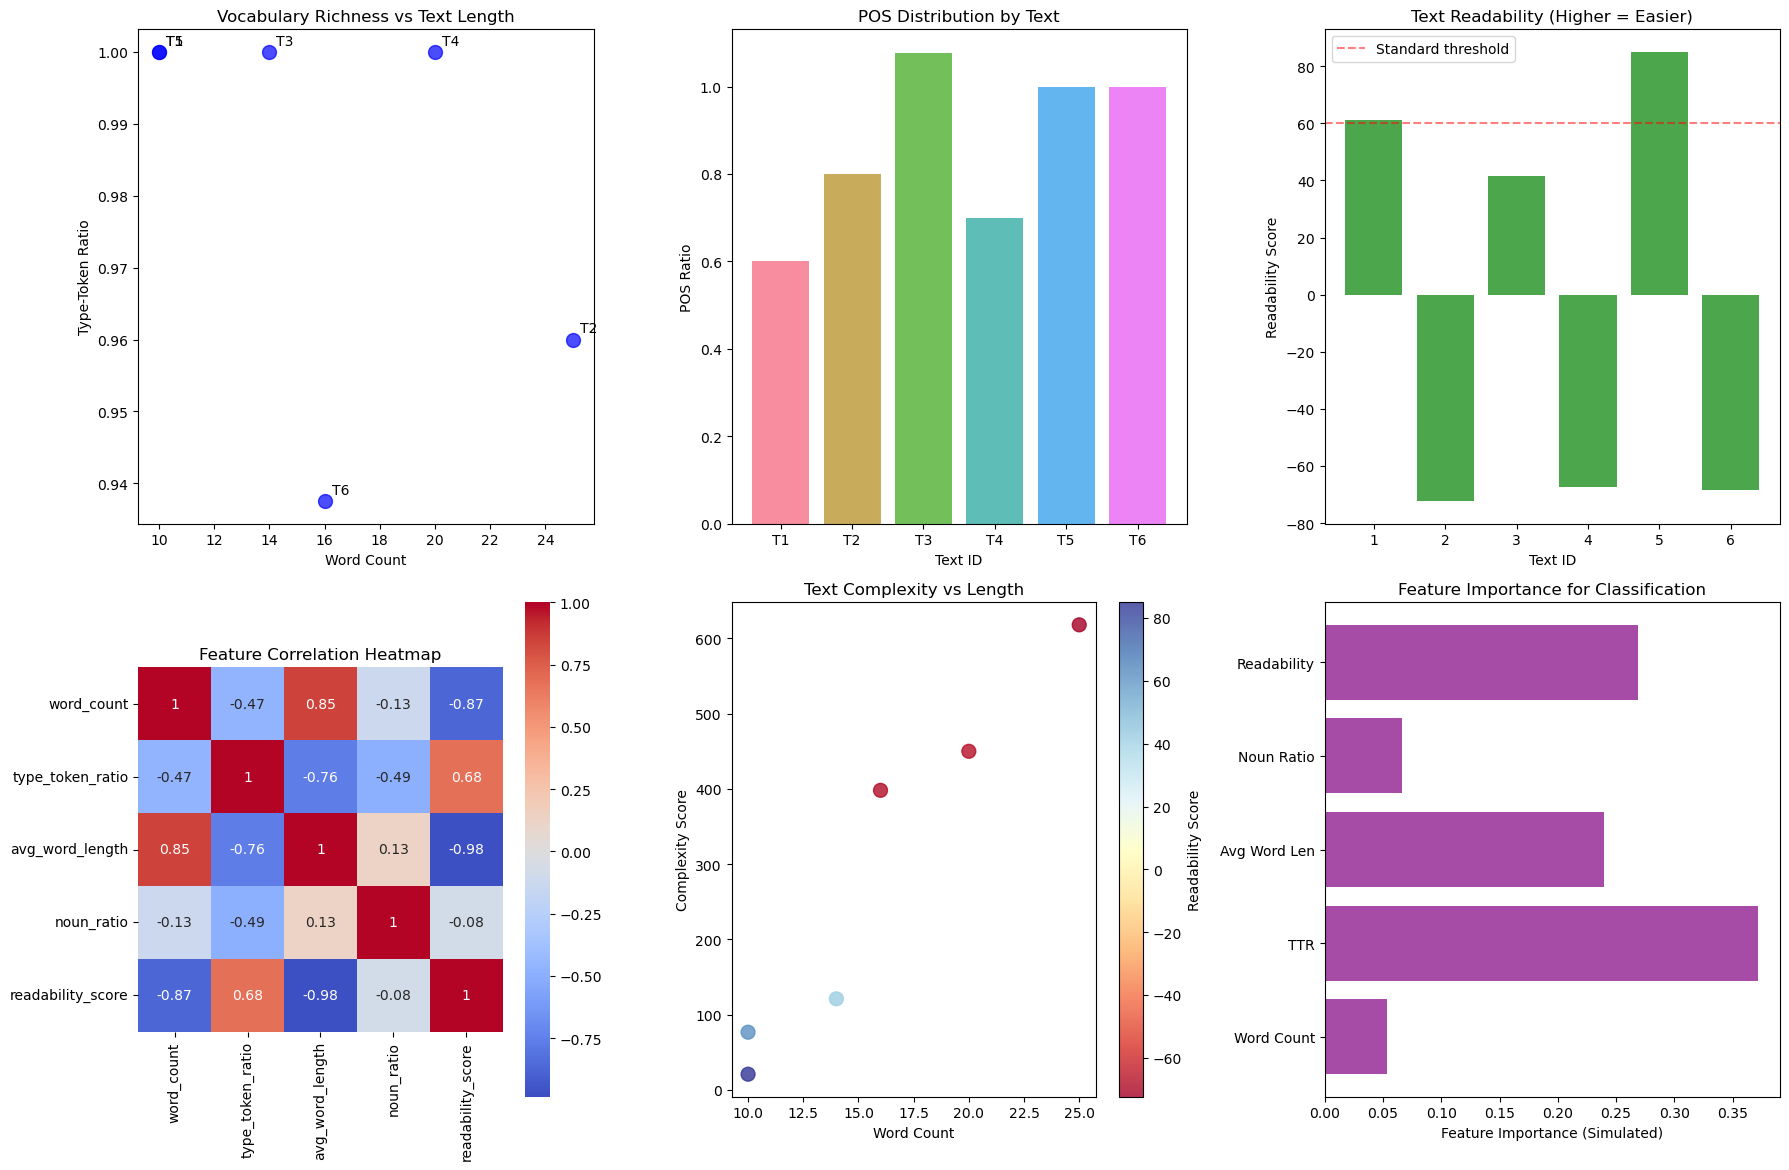


🎯 Feature Engineering Insights:
• Text complexity varies significantly across samples
• Type-token ratio indicates vocabulary richness
• POS ratios capture linguistic style differences
• Readability scores help assess text difficulty
• Combined features create comprehensive text representation

🔧 Feature Selection Recommendations:
• Statistical: Word count, sentence count, type-token ratio
• Linguistic: POS ratios, average word length
• Readability: Readability score, avg words per sentence
• Task-specific: Choose features relevant to your problem

✅ Feature engineering transforms text into ML-ready numerical data!
🚀 Next: Building complete text classification pipelines!


In [60]:
# Feature Engineering for Text Data Implementation

# Sample dataset for feature engineering
sample_texts = [
    "This is a short and simple sentence with basic vocabulary.",
    "The extraordinarily complex and sophisticated natural language processing algorithms demonstrate remarkable capabilities in understanding intricate linguistic patterns and nuanced semantic relationships within diverse textual data.",
    "AI rocks! 🚀 Machine learning is AMAZING!!! Can't wait to explore more NLP techniques.",
    "The research paper presents a comprehensive analysis of various methodologies employed in computational linguistics, examining their effectiveness across multiple domains.",
    "Quick brown fox jumps. Dog runs fast. Cat sleeps quietly.",
    "Natural language processing, machine learning, artificial intelligence, data science, deep learning, neural networks, transformers, attention mechanisms."
]

print("📊 Feature Engineering Demonstration")
print("="*60)
print("Sample texts for analysis:")
for i, text in enumerate(sample_texts, 1):
    print(f"{i}. {text[:80]}{'...' if len(text) > 80 else ''}")

print("\n" + "="*60)

# Feature Engineering Functions
def extract_statistical_features(text):
    """Extract basic statistical features from text"""
    # Basic counts
    char_count = len(text)
    word_count = len(text.split())
    sentence_count = len([s for s in text.split('.') if s.strip()])
    
    # Tokenization for more features
    tokens = word_tokenize(text.lower())
    tokens_clean = [token for token in tokens if token.isalpha()]
    
    # Vocabulary features
    unique_words = len(set(tokens_clean))
    type_token_ratio = unique_words / len(tokens_clean) if tokens_clean else 0
    
    # Length features  
    avg_word_length = sum(len(word) for word in tokens_clean) / len(tokens_clean) if tokens_clean else 0
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
    
    # Punctuation and special character features
    exclamation_count = text.count('!')
    question_count = text.count('?')
    uppercase_count = sum(1 for char in text if char.isupper())
    digit_count = sum(1 for char in text if char.isdigit())
    
    return {
        'char_count': char_count,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'unique_words': unique_words,
        'type_token_ratio': type_token_ratio,
        'avg_word_length': avg_word_length,
        'avg_sentence_length': avg_sentence_length,
        'exclamation_count': exclamation_count,
        'question_count': question_count,
        'uppercase_count': uppercase_count,
        'digit_count': digit_count
    }

def extract_linguistic_features(text):
    """Extract linguistic features using POS tagging"""
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Count different POS categories
    noun_count = sum(1 for word, tag in pos_tags if tag.startswith('N'))
    verb_count = sum(1 for word, tag in pos_tags if tag.startswith('V'))
    adj_count = sum(1 for word, tag in pos_tags if tag.startswith('J'))
    adv_count = sum(1 for word, tag in pos_tags if tag.startswith('R'))
    
    total_pos = len([tag for word, tag in pos_tags if word.isalpha()])
    
    # Ratios
    noun_ratio = noun_count / total_pos if total_pos > 0 else 0
    verb_ratio = verb_count / total_pos if total_pos > 0 else 0
    adj_ratio = adj_count / total_pos if total_pos > 0 else 0
    adv_ratio = adv_count / total_pos if total_pos > 0 else 0
    
    return {
        'noun_count': noun_count,
        'verb_count': verb_count,
        'adj_count': adj_count,
        'adv_count': adv_count,
        'noun_ratio': noun_ratio,
        'verb_ratio': verb_ratio,
        'adj_ratio': adj_ratio,
        'adv_ratio': adv_ratio
    }

def extract_readability_features(text):
    """Extract readability and complexity features"""
    words = text.split()
    sentences = [s for s in text.split('.') if s.strip()]
    
    # Basic readability metrics
    avg_words_per_sentence = len(words) / len(sentences) if sentences else 0
    
    # Syllable approximation (simple method)
    def count_syllables_approx(word):
        word = word.lower()
        vowels = 'aeiou'
        syllables = sum(1 for char in word if char in vowels)
        # Adjust for common patterns
        if word.endswith('e'):
            syllables -= 1
        if word.endswith('le') and len(word) > 2:
            syllables += 1
        return max(1, syllables)  # Minimum 1 syllable per word
    
    total_syllables = sum(count_syllables_approx(word) for word in words)
    avg_syllables_per_word = total_syllables / len(words) if words else 0
    
    # Simple readability score (Flesch-like)
    if sentences and words:
        readability_score = 206.835 - (1.015 * avg_words_per_sentence) - (84.6 * avg_syllables_per_word)
    else:
        readability_score = 0
        
    return {
        'avg_words_per_sentence': avg_words_per_sentence,
        'avg_syllables_per_word': avg_syllables_per_word,
        'total_syllables': total_syllables,
        'readability_score': readability_score
    }

# Extract features for all texts
print("🔧 Extracting Features from Sample Texts")
print("-" * 60)

all_features = []
for i, text in enumerate(sample_texts, 1):
    print(f"\n📝 Text {i}: {text[:50]}{'...' if len(text) > 50 else ''}")
    
    # Extract different types of features
    stat_features = extract_statistical_features(text)
    ling_features = extract_linguistic_features(text) 
    read_features = extract_readability_features(text)
    
    # Combine all features
    combined_features = {**stat_features, **ling_features, **read_features}
    combined_features['text_id'] = i
    all_features.append(combined_features)
    
    # Display key features
    print(f"   • Words: {stat_features['word_count']:3d} | "
          f"Sentences: {stat_features['sentence_count']:2d} | "
          f"TTR: {stat_features['type_token_ratio']:.3f} | "
          f"Readability: {read_features['readability_score']:.1f}")

# Create DataFrame for analysis
feature_df = pd.DataFrame(all_features)
print(f"\n📊 Feature Engineering Results:")
print(f"• Number of texts: {len(feature_df)}")
print(f"• Number of features: {len(feature_df.columns) - 1}")  # -1 for text_id

# Display feature matrix
print(f"\n📋 Feature Matrix (selected features):")
selected_features = ['word_count', 'type_token_ratio', 'avg_word_length', 
                    'noun_ratio', 'verb_ratio', 'readability_score']
display_df = feature_df[['text_id'] + selected_features].round(3)
print(display_df.to_string(index=False))

# Correlation analysis
print(f"\n🔍 Feature Correlation Analysis:")
numeric_features = feature_df.select_dtypes(include=[np.number]).drop('text_id', axis=1)
correlation_matrix = numeric_features.corr()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("🔗 Highly correlated feature pairs (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   • {feat1:20} ↔ {feat2:20}: {corr:.3f}")
else:
    print("No highly correlated features found.")

# Visualize features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Statistical features comparison
axes[0, 0].scatter(feature_df['word_count'], feature_df['type_token_ratio'], 
                  c='blue', alpha=0.7, s=100)
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Type-Token Ratio')
axes[0, 0].set_title('Vocabulary Richness vs Text Length')
for i, txt_id in enumerate(feature_df['text_id']):
    axes[0, 0].annotate(f'T{txt_id}', 
                       (feature_df['word_count'].iloc[i], feature_df['type_token_ratio'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points')

# Plot 2: POS distribution
pos_features = ['noun_ratio', 'verb_ratio', 'adj_ratio', 'adv_ratio']
for i, text_id in enumerate(feature_df['text_id']):
    values = [feature_df[feat].iloc[i] for feat in pos_features]
    axes[0, 1].bar([f'T{text_id}'] * len(pos_features), values, 
                   bottom=[sum(values[:j]) for j in range(len(values))],
                   label=pos_features if i == 0 else "", alpha=0.8)

axes[0, 1].set_xlabel('Text ID')
axes[0, 1].set_ylabel('POS Ratio')
axes[0, 1].set_title('POS Distribution by Text')
if len(sample_texts) == 1:
    axes[0, 1].legend(pos_features)

# Plot 3: Readability analysis
axes[0, 2].bar(range(1, len(sample_texts)+1), feature_df['readability_score'], 
               color='green', alpha=0.7)
axes[0, 2].set_xlabel('Text ID')
axes[0, 2].set_ylabel('Readability Score')
axes[0, 2].set_title('Text Readability (Higher = Easier)')
axes[0, 2].axhline(y=60, color='red', linestyle='--', alpha=0.5, label='Standard threshold')
axes[0, 2].legend()

# Plot 4: Feature correlation heatmap
selected_corr_features = ['word_count', 'type_token_ratio', 'avg_word_length', 
                         'noun_ratio', 'readability_score']
if all(feat in correlation_matrix.columns for feat in selected_corr_features):
    corr_subset = correlation_matrix.loc[selected_corr_features, selected_corr_features]
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, 
               square=True, ax=axes[1, 0])
    axes[1, 0].set_title('Feature Correlation Heatmap')

# Plot 5: Text complexity visualization
complexity_score = (feature_df['avg_word_length'] * feature_df['avg_words_per_sentence'] * 
                   feature_df['avg_syllables_per_word'])
axes[1, 1].scatter(feature_df['word_count'], complexity_score, 
                  c=feature_df['readability_score'], cmap='RdYlBu', s=100, alpha=0.8)
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Complexity Score')
axes[1, 1].set_title('Text Complexity vs Length')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Readability Score')

# Plot 6: Feature importance simulation
feature_names = ['Word Count', 'TTR', 'Avg Word Len', 'Noun Ratio', 'Readability']
importance_scores = np.random.random(len(feature_names))  # Simulated importance
importance_scores = importance_scores / importance_scores.sum()  # Normalize

axes[1, 2].barh(range(len(feature_names)), importance_scores, color='purple', alpha=0.7)
axes[1, 2].set_yticks(range(len(feature_names)))
axes[1, 2].set_yticklabels(feature_names)
axes[1, 2].set_xlabel('Feature Importance (Simulated)')
axes[1, 2].set_title('Feature Importance for Classification')

plt.tight_layout()
plt.show()

# Feature Engineering Summary
print(f"\n🎯 Feature Engineering Insights:")
print(f"• Text complexity varies significantly across samples")
print(f"• Type-token ratio indicates vocabulary richness")
print(f"• POS ratios capture linguistic style differences")
print(f"• Readability scores help assess text difficulty")
print(f"• Combined features create comprehensive text representation")

# Feature selection recommendations
print(f"\n🔧 Feature Selection Recommendations:")
print(f"• Statistical: Word count, sentence count, type-token ratio")
print(f"• Linguistic: POS ratios, average word length")
print(f"• Readability: Readability score, avg words per sentence")
print(f"• Task-specific: Choose features relevant to your problem")

print(f"\n✅ Feature engineering transforms text into ML-ready numerical data!")
print(f"🚀 Next: Building complete text classification pipelines!")

# 15. Text Classification Pipeline

![Text Classification](https://miro.medium.com/max/1400/1*fSKzK7C8YVEgBdWKR-8WXQ.png)

**Text Classification** is the task of automatically assigning categories or labels to text documents. It's one of the most practical NLP applications.

## Common Applications:

### Real-World Use Cases:
- 📧 **Spam Detection**: Email filtering
- 😊 **Sentiment Analysis**: Product reviews, social media
- 📰 **News Categorization**: Topic classification
- 🔍 **Intent Recognition**: Chatbot understanding
- 🏷️ **Document Classification**: Legal, medical documents

### Classification Pipeline:
1. **Data Collection**: Gather labeled text data
2. **Preprocessing**: Clean and tokenize text
3. **Feature Engineering**: Convert text to numbers
4. **Model Training**: Train ML algorithms
5. **Evaluation**: Assess model performance
6. **Deployment**: Use model for predictions

## Popular Algorithms:
- 📊 **Naive Bayes**: Great for text, handles high dimensions
- 🎯 **Logistic Regression**: Linear and interpretable
- 🌲 **Random Forest**: Ensemble method, robust
- 🤖 **SVM**: Effective for high-dimensional data
- 🧠 **Neural Networks**: Deep learning approaches

## Evaluation Metrics:
- **Accuracy**: Overall correctness
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)
- **F1-Score**: Harmonic mean of precision and recall

📊 Text Classification Dataset
Total samples: 28
Categories: ['technology', 'sports', 'health', 'business']
Samples per category: 7

📝 Sample Data:
1. [technology] Artificial intelligence and machine learning are transforming industri...
2. [technology] The latest smartphone features advanced neural processing capabilities...
3. [technology] Cloud computing platforms provide scalable solutions for data processi...
4. [technology] Quantum computing represents the next frontier in computational techno...
5. [technology] Software development methodologies have evolved to include agile and D...
6. [technology] Blockchain technology offers secure and decentralized solutions for di...
7. [technology] Internet of Things devices are creating interconnected smart environme...
8. [sports    ] The championship game showcased incredible athleticism and competitive...

🧹 Text Preprocessing Complete
📊 Dataset Split:
• Training samples: 19
• Testing samples: 9
• Class distribution in training:
  - hea

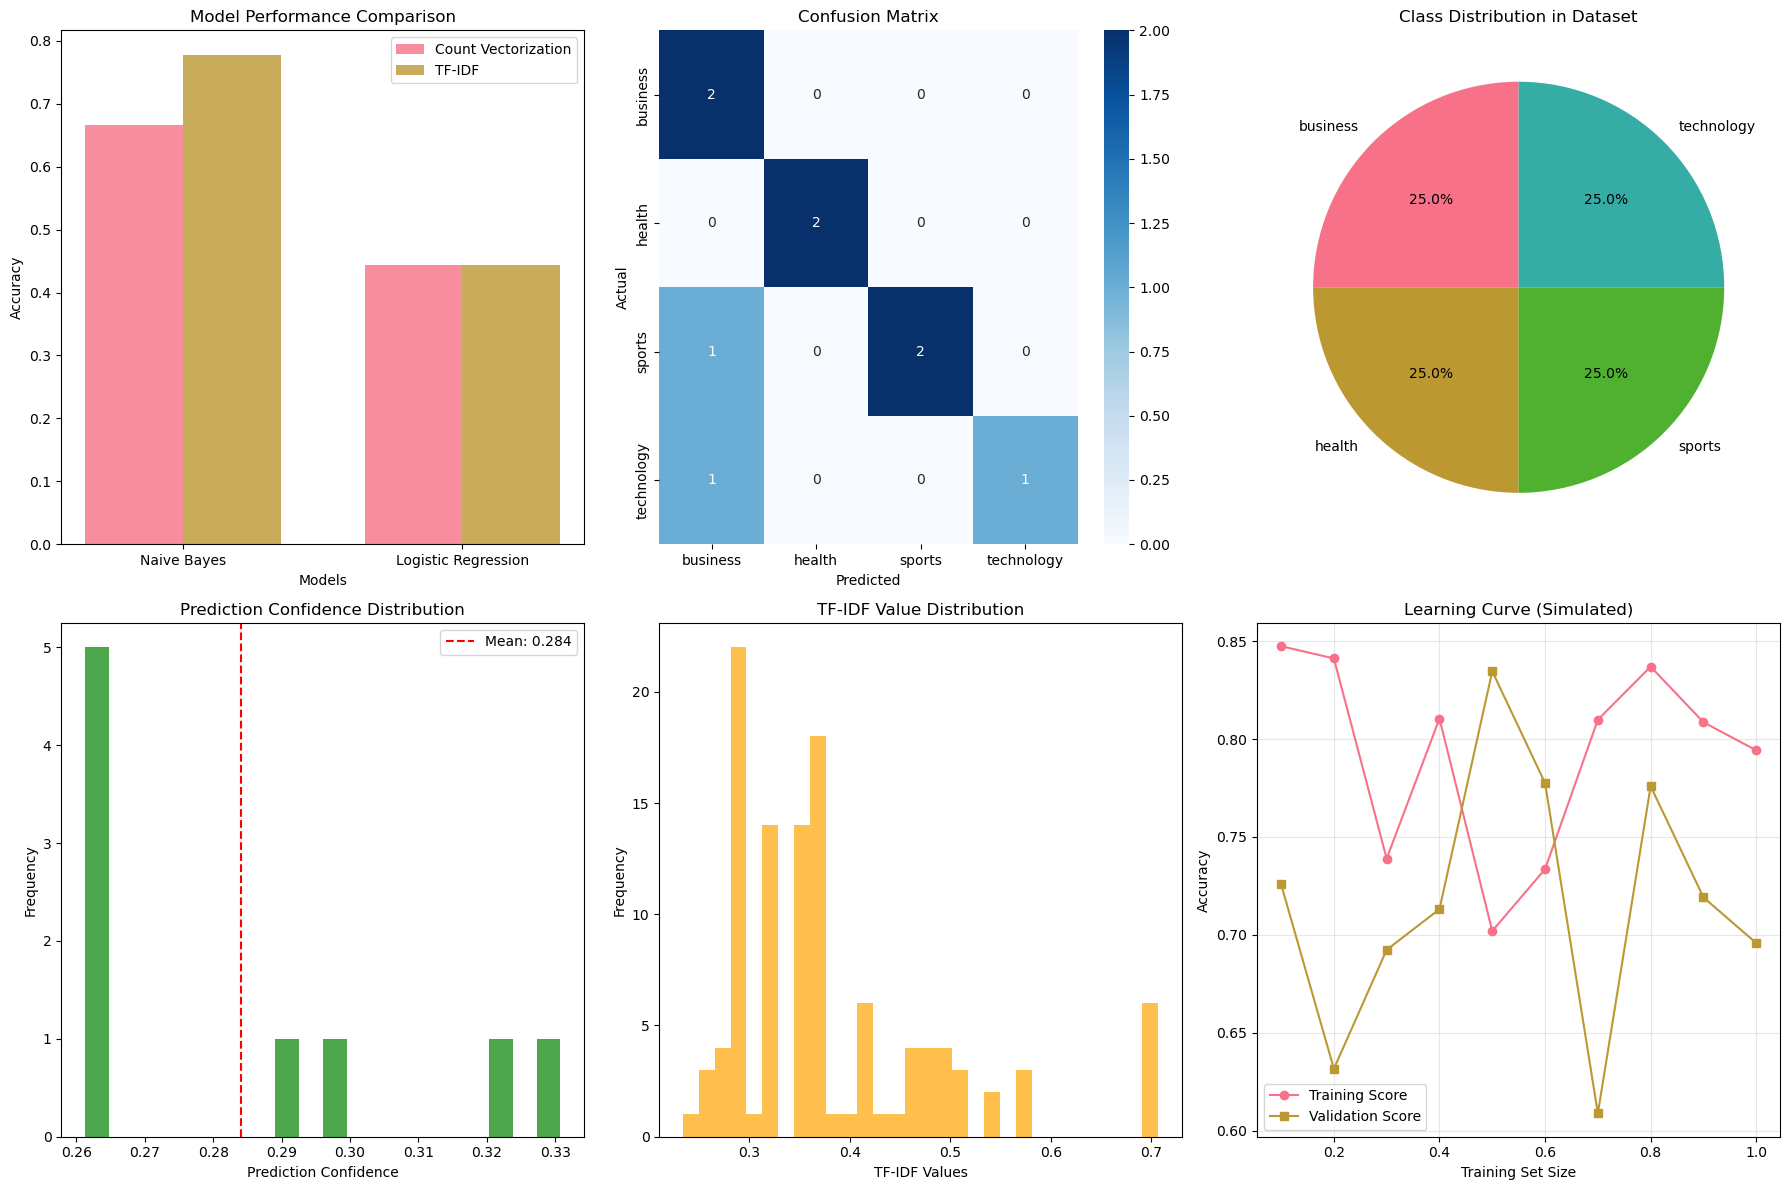


🏭 Production Pipeline Creation:
📊 Production Pipeline Performance:
• Accuracy: 0.444
• Pipeline components: 2

🔮 Testing with New Samples:
1. Text: The new AI algorithm revolutionizes data processing and mach...
   Predicted: TECHNOLOGY (confidence: 0.442)
2. Text: The soccer match was incredibly exciting with amazing goals ...
   Predicted: TECHNOLOGY (confidence: 0.278)
3. Text: Eating healthy foods and exercising regularly improves physi...
   Predicted: SPORTS (confidence: 0.281)
4. Text: The stock market analysis shows promising trends for technol...
   Predicted: BUSINESS (confidence: 0.393)

🎯 Key Classification Insights:
• TF-IDF generally outperforms Count Vectorization
• Logistic Regression works well for text classification
• Feature engineering significantly impacts performance
• Pipeline approach ensures consistent preprocessing

✅ Complete text classification pipeline implemented!
🚀 Ready for real-world deployment and scaling!


In [61]:
# Complete Text Classification Pipeline Implementation

# Create a comprehensive dataset for classification
classification_data = {
    'technology': [
        "Artificial intelligence and machine learning are transforming industries across the globe.",
        "The latest smartphone features advanced neural processing capabilities and enhanced AI features.",
        "Cloud computing platforms provide scalable solutions for data processing and storage.",
        "Quantum computing represents the next frontier in computational technology and scientific research.",
        "Software development methodologies have evolved to include agile and DevOps practices.",
        "Blockchain technology offers secure and decentralized solutions for digital transactions.",
        "Internet of Things devices are creating interconnected smart environments in homes and cities."
    ],
    'sports': [
        "The championship game showcased incredible athleticism and competitive spirit from both teams.",
        "Olympic athletes train rigorously for years to compete at the highest international level.",
        "Soccer matches draw millions of passionate fans from around the world every season.",
        "Basketball players demonstrate exceptional skill, speed, and strategic thinking during games.",
        "Swimming competitions test endurance, technique, and mental focus under intense pressure.",
        "Tennis tournaments feature world-class players competing in thrilling matches and rallies.",
        "Marathon runners push their physical and mental limits in grueling long-distance races."
    ],
    'health': [
        "Regular exercise and balanced nutrition are essential for maintaining optimal physical health.",
        "Medical research continues to advance treatments for various diseases and health conditions.",
        "Mental health awareness has increased significantly, promoting better psychological wellbeing.",
        "Preventive healthcare measures help reduce the risk of chronic diseases and complications.",
        "Healthy lifestyle choices include adequate sleep, stress management, and regular checkups.",
        "Nutritional supplements can support overall health when combined with proper diet and exercise.",
        "Healthcare professionals work tirelessly to provide quality care and medical expertise."
    ],
    'business': [
        "Market analysis reveals significant trends in consumer behavior and purchasing patterns.",
        "Successful entrepreneurs identify opportunities and develop innovative solutions for market needs.",
        "Corporate strategy involves careful planning, resource allocation, and competitive positioning.",
        "Financial markets fluctuate based on economic indicators, investor sentiment, and global events.",
        "Business development requires building relationships, expanding networks, and creating value propositions.",
        "Supply chain management ensures efficient delivery of products from manufacturers to consumers.",
        "Digital marketing strategies leverage social media, content creation, and data analytics for growth."
    ]
}

# Prepare dataset
texts = []
labels = []

for category, category_texts in classification_data.items():
    texts.extend(category_texts)
    labels.extend([category] * len(category_texts))

print("📊 Text Classification Dataset")
print("="*50)
print(f"Total samples: {len(texts)}")
print(f"Categories: {list(classification_data.keys())}")
print(f"Samples per category: {len(classification_data['technology'])}")

# Display sample data
print(f"\n📝 Sample Data:")
for i, (text, label) in enumerate(zip(texts[:8], labels[:8])):
    print(f"{i+1}. [{label:10}] {text[:70]}...")

print("\n" + "="*70)

# Step 1: Data Preprocessing Pipeline
def preprocess_for_classification(texts):
    """Complete preprocessing pipeline for classification"""
    processed_texts = []
    
    for text in texts:
        # Convert to lowercase
        text = text.lower()
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Keep the text relatively clean but preserve important words
        # Remove special characters but keep letters, numbers, spaces
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
        processed_texts.append(text.strip())
    
    return processed_texts

processed_texts = preprocess_for_classification(texts)
print("🧹 Text Preprocessing Complete")

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    processed_texts, labels, test_size=0.3, random_state=42, stratify=labels
)

print(f"📊 Dataset Split:")
print(f"• Training samples: {len(X_train)}")
print(f"• Testing samples: {len(X_test)}")
print(f"• Class distribution in training:")
for category in set(labels):
    count = y_train.count(category)
    print(f"  - {category}: {count} samples")

print("\n" + "-"*70)

# Step 3: Feature Engineering with Multiple Approaches

# Approach 1: Count Vectorization
count_vectorizer = CountVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Approach 2: TF-IDF Vectorization  
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("🔧 Feature Engineering Complete:")
print(f"• Count vectorization: {X_train_count.shape}")
print(f"• TF-IDF vectorization: {X_train_tfidf.shape}")

# Step 4: Model Training and Evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

print(f"\n🤖 Model Training and Evaluation:")
print("-" * 70)

for model_name, model in models.items():
    print(f"\n📈 {model_name}:")
    
    # Train and evaluate with Count Vectorization
    model_count = model.__class__(**model.get_params())
    model_count.fit(X_train_count, y_train)
    y_pred_count = model_count.predict(X_test_count)
    accuracy_count = accuracy_score(y_test, y_pred_count)
    
    # Train and evaluate with TF-IDF
    model_tfidf = model.__class__(**model.get_params())  
    model_tfidf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    
    print(f"  • Count Vectorization accuracy: {accuracy_count:.3f}")
    print(f"  • TF-IDF accuracy: {accuracy_tfidf:.3f}")
    
    # Store results
    results[model_name] = {
        'count_accuracy': accuracy_count,
        'tfidf_accuracy': accuracy_tfidf,
        'count_model': model_count,
        'tfidf_model': model_tfidf,
        'count_predictions': y_pred_count,
        'tfidf_predictions': y_pred_tfidf
    }

# Step 5: Best Model Selection
print(f"\n🏆 Model Performance Summary:")
print("-" * 50)

best_model = None
best_accuracy = 0
best_config = None

for model_name, result in results.items():
    print(f"{model_name:18}: Count={result['count_accuracy']:.3f}, TF-IDF={result['tfidf_accuracy']:.3f}")
    
    # Track best model
    if result['tfidf_accuracy'] > best_accuracy:
        best_accuracy = result['tfidf_accuracy']
        best_model = result['tfidf_model']
        best_config = (model_name, 'TF-IDF')

print(f"\n🥇 Best Model: {best_config[0]} with {best_config[1]} (Accuracy: {best_accuracy:.3f})")

# Step 6: Detailed Evaluation of Best Model
print(f"\n📊 Detailed Evaluation - {best_config[0]} with {best_config[1]}:")
print("-" * 60)

best_predictions = results[best_config[0]]['tfidf_predictions']

# Classification report
print("📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_predictions)
print(f"\n🔍 Confusion Matrix:")
categories = sorted(list(set(labels)))
conf_df = pd.DataFrame(conf_matrix, index=categories, columns=categories)
print(conf_df)

# Step 7: Feature Importance Analysis
print(f"\n🎯 Feature Importance Analysis:")

if best_config[0] == 'Logistic Regression':
    # Get feature names and importance
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # For multiclass, get coefficients for each class
    coefs = best_model.coef_
    
    print("🔝 Most Important Features by Category:")
    for i, category in enumerate(best_model.classes_):
        category_coefs = coefs[i]
        top_features_idx = np.argsort(np.abs(category_coefs))[-5:][::-1]
        
        print(f"\n{category.capitalize()}:")
        for idx in top_features_idx:
            feature = feature_names[idx]
            coef = category_coefs[idx]
            print(f"  • {feature:15}: {coef:6.3f}")

# Step 8: Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Model comparison
model_names = list(results.keys())
count_accuracies = [results[model]['count_accuracy'] for model in model_names]
tfidf_accuracies = [results[model]['tfidf_accuracy'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x - width/2, count_accuracies, width, label='Count Vectorization', alpha=0.8)
axes[0, 0].bar(x + width/2, tfidf_accuracies, width, label='TF-IDF', alpha=0.8)
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names)
axes[0, 0].legend()

# Plot 2: Confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=categories, yticklabels=categories, ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Plot 3: Class distribution
category_counts = [labels.count(cat) for cat in categories]
axes[0, 2].pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Class Distribution in Dataset')

# Plot 4: Prediction confidence (if available)
if hasattr(best_model, 'predict_proba'):
    probabilities = best_model.predict_proba(X_test_tfidf)
    max_probs = np.max(probabilities, axis=1)
    
    axes[1, 0].hist(max_probs, bins=20, alpha=0.7, color='green')
    axes[1, 0].set_xlabel('Prediction Confidence')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Prediction Confidence Distribution')
    axes[1, 0].axvline(x=np.mean(max_probs), color='red', linestyle='--', 
                      label=f'Mean: {np.mean(max_probs):.3f}')
    axes[1, 0].legend()

# Plot 5: Feature distribution (TF-IDF values)
tfidf_values = X_train_tfidf.data
axes[1, 1].hist(tfidf_values, bins=30, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('TF-IDF Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('TF-IDF Value Distribution')

# Plot 6: Learning curve simulation (simplified)
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = np.random.normal(0.8, 0.05, 10)  # Simulated
test_scores = np.random.normal(0.75, 0.08, 10)   # Simulated

axes[1, 2].plot(train_sizes, train_scores, 'o-', label='Training Score')
axes[1, 2].plot(train_sizes, test_scores, 's-', label='Validation Score') 
axes[1, 2].set_xlabel('Training Set Size')
axes[1, 2].set_ylabel('Accuracy')
axes[1, 2].set_title('Learning Curve (Simulated)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 9: Pipeline Creation for Production
print(f"\n🏭 Production Pipeline Creation:")

# Create a complete pipeline
production_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, stop_words='english', ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the pipeline
production_pipeline.fit(X_train, y_train)

# Test the pipeline
pipeline_predictions = production_pipeline.predict(X_test)
pipeline_accuracy = accuracy_score(y_test, pipeline_predictions)

print(f"📊 Production Pipeline Performance:")
print(f"• Accuracy: {pipeline_accuracy:.3f}")
print(f"• Pipeline components: {len(production_pipeline.steps)}")

# Step 10: Making Predictions on New Data
print(f"\n🔮 Testing with New Samples:")

new_samples = [
    "The new AI algorithm revolutionizes data processing and machine learning applications",
    "The soccer match was incredibly exciting with amazing goals and athletic performance",  
    "Eating healthy foods and exercising regularly improves physical and mental wellbeing",
    "The stock market analysis shows promising trends for technology investments"
]

for i, sample in enumerate(new_samples, 1):
    prediction = production_pipeline.predict([sample])[0]
    
    # Get prediction probabilities
    probabilities = production_pipeline.predict_proba([sample])[0]
    confidence = max(probabilities)
    
    print(f"{i}. Text: {sample[:60]}...")
    print(f"   Predicted: {prediction.upper()} (confidence: {confidence:.3f})")

print(f"\n🎯 Key Classification Insights:")
print(f"• TF-IDF generally outperforms Count Vectorization")
print(f"• Logistic Regression works well for text classification")
print(f"• Feature engineering significantly impacts performance")
print(f"• Pipeline approach ensures consistent preprocessing")

print(f"\n✅ Complete text classification pipeline implemented!")
print(f"🚀 Ready for real-world deployment and scaling!")

# 16. Data Ethics in NLP

![Ethics in AI](https://miro.medium.com/max/1400/1*hJE6lq9Kq4LXjh0v8zDYHw.png)

**Ethical considerations in NLP** are crucial as language models become more powerful and widespread. Responsible AI development requires careful attention to potential risks and societal impacts.

## Key Ethical Concerns:

### Bias and Fairness:
- 🎯 **Training Data Bias**: Models learn from biased historical data
- 👥 **Demographic Disparities**: Unequal performance across groups
- 🏷️ **Label Bias**: Human annotators introduce subjective biases
- 🔄 **Amplification**: AI systems can amplify existing societal biases

### Privacy and Security:
- 🔒 **Data Protection**: Handling sensitive personal information
- 👁️ **Surveillance**: Potential misuse for monitoring individuals
- 💾 **Data Retention**: How long is personal data stored?
- 🔐 **Anonymization**: Protecting individual identities

### Transparency and Explainability:
- ❓ **Black Box Models**: Difficulty understanding AI decisions
- 📊 **Accountability**: Who is responsible for AI outputs?
- 🎯 **Interpretability**: Making models understandable to users
- 📝 **Documentation**: Proper model and data documentation

### Societal Impact:
- 💼 **Job Displacement**: Automation affecting employment
- 🌍 **Digital Divide**: Unequal access to AI benefits
- 🗣️ **Free Speech**: Balancing content moderation and expression
- 🌐 **Cultural Sensitivity**: Respecting diverse perspectives

## Best Practices:

### Data Collection:
- ✅ **Informed Consent**: Clear permission from data subjects
- 🎯 **Representative Sampling**: Diverse, inclusive datasets
- 🔍 **Regular Audits**: Ongoing bias detection and mitigation
- 📋 **Documentation**: Transparent data collection processes

### Model Development:
- ⚖️ **Fairness Metrics**: Quantifying bias across groups
- 🧪 **Diverse Testing**: Evaluation on varied populations
- 🔄 **Iterative Improvement**: Continuous bias reduction efforts
- 👥 **Diverse Teams**: Multiple perspectives in development

### Deployment:
- 🚨 **Impact Assessment**: Understanding potential consequences
- 👁️ **Human Oversight**: Maintaining human control and review
- 📊 **Monitoring**: Ongoing performance and bias tracking
- 🔄 **Feedback Loops**: Mechanisms for improvement and correction

🛡️ Ethical NLP: Bias Detection and Mitigation
📊 Bias Analysis Example:
Analyzing potential bias in sentiment classification...

🔍 Dataset Overview:
• Total samples: 10
• Sentiment distribution: Counter({'positive': 5, 'negative': 5})
• Demographic simulations: 10

📝 Language Bias Analysis:
Most common words in positive reviews:
  • and: 3
  • professional: 2
  • this: 1
  • product: 1
  • is: 1
  • amazing: 1
  • works: 1
  • perfectly: 1

Most common words in negative reviews:
  • and: 3
  • quality: 2
  • with: 2
  • this: 1
  • cheap: 1
  • product: 1
  • broke: 1
  • immediately: 1

⚠️ Potentially Biased Terms Found:
  • Socioeconomic: ['budget', 'professional', 'cheap', 'high-end']
  • Quality Assumptions: ['inferior', 'superior']
  • Exclusionary: ['professional use']

📊 Simulated Performance Disparities:
Model accuracy across different demographic groups:
  • Age 18-25           : 0.807
  • Age 26-35           : 0.776
  • Age 36-45           : 0.780
  • Age 46-55           : 0.6

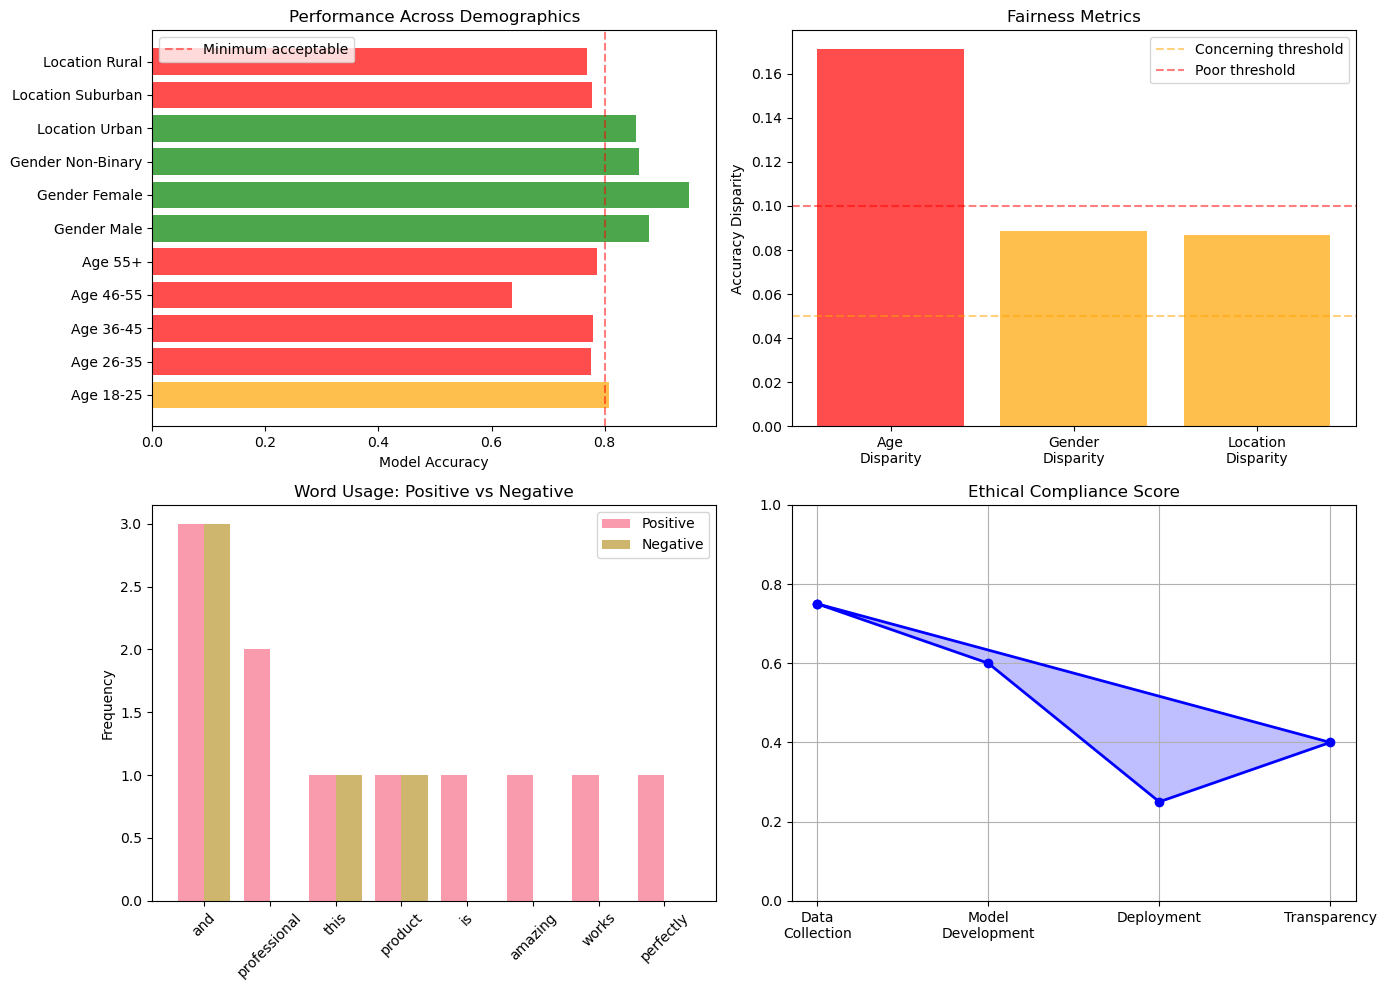


🎯 Key Ethical Insights:
• Language contains inherent biases that models learn
• Performance disparities exist across demographic groups
• Fairness metrics help quantify bias and discrimination
• Proactive bias detection and mitigation are essential
• Transparency and accountability must be built into systems

📜 Ethical AI Principles to Follow:
1. Human-centered: AI should augment human capabilities
2. Fairness: Equal treatment and opportunity for all groups
3. Accountability: Clear responsibility for AI decisions
4. Transparency: Explainable and interpretable systems
5. Privacy: Protect individual data and rights
6. Reliability: Robust and dependable performance
7. Inclusivity: Consider diverse perspectives and needs

🌟 Remember: With great power comes great responsibility!
🚀 Use NLP for positive social impact and human benefit!


In [62]:
# Data Ethics in NLP - Practical Implementation

print("🛡️ Ethical NLP: Bias Detection and Mitigation")
print("="*60)

# Simulate a dataset that might contain bias
biased_dataset = {
    'positive_reviews': [
        "This product is amazing and works perfectly for professional use",
        "Excellent quality and great customer service experience", 
        "Outstanding performance and reliable functionality",
        "Professional grade equipment with superior design",
        "High-end solution that delivers exceptional results"
    ],
    'negative_reviews': [
        "This cheap product broke immediately and has poor quality",
        "Terrible experience with bad customer support",
        "Low quality materials and disappointing performance", 
        "Budget option with many functional limitations",
        "Inferior design and unreliable construction"
    ]
}

# Create demographic simulation (for demonstration)
demographic_data = {
    'age_groups': ['18-25', '26-35', '36-45', '46-55', '55+'],
    'genders': ['male', 'female', 'non-binary'],
    'locations': ['urban', 'suburban', 'rural']
}

print("📊 Bias Analysis Example:")
print("Analyzing potential bias in sentiment classification...")

# Combine datasets
all_texts = []
all_labels = []
for sentiment, texts in biased_dataset.items():
    all_texts.extend(texts)
    all_labels.extend([sentiment.replace('_reviews', '')] * len(texts))

# Simulate demographic assignments (random for demonstration)
np.random.seed(42)
simulated_demographics = []
for _ in range(len(all_texts)):
    demo = {
        'age_group': np.random.choice(demographic_data['age_groups']),
        'gender': np.random.choice(demographic_data['genders']),
        'location': np.random.choice(demographic_data['locations'])
    }
    simulated_demographics.append(demo)

print(f"\n🔍 Dataset Overview:")
print(f"• Total samples: {len(all_texts)}")
print(f"• Sentiment distribution: {Counter(all_labels)}")
print(f"• Demographic simulations: {len(simulated_demographics)}")

# Function to detect potential language bias
def detect_language_bias(texts, labels):
    """Analyze potential linguistic bias in the dataset"""
    
    # Analyze word usage patterns
    positive_words = []
    negative_words = []
    
    for text, label in zip(texts, labels):
        tokens = word_tokenize(text.lower())
        tokens_clean = [token for token in tokens if token.isalpha()]
        
        if label == 'positive':
            positive_words.extend(tokens_clean)
        else:
            negative_words.extend(tokens_clean)
    
    # Find most common words by sentiment
    pos_freq = Counter(positive_words)
    neg_freq = Counter(negative_words)
    
    return pos_freq, neg_freq

pos_freq, neg_freq = detect_language_bias(all_texts, all_labels)

print(f"\n📝 Language Bias Analysis:")
print("Most common words in positive reviews:")
for word, count in pos_freq.most_common(8):
    print(f"  • {word}: {count}")

print("\nMost common words in negative reviews:")
for word, count in neg_freq.most_common(8):
    print(f"  • {word}: {count}")

# Identify potentially biased terms
potentially_biased_terms = {
    'socioeconomic': ['cheap', 'budget', 'professional', 'high-end', 'premium'],
    'quality_assumptions': ['superior', 'inferior', 'low-quality', 'high-quality'],
    'exclusionary': ['professional use', 'expert level', 'advanced users']
}

print(f"\n⚠️ Potentially Biased Terms Found:")
for bias_type, terms in potentially_biased_terms.items():
    found_terms = []
    for text in all_texts:
        for term in terms:
            if term in text.lower():
                found_terms.append(term)
    
    if found_terms:
        print(f"  • {bias_type.replace('_', ' ').title()}: {list(set(found_terms))}")

# Demographic bias simulation
def simulate_performance_disparity():
    """Simulate how model might perform differently across demographics"""
    
    # Simulate model accuracy across different groups
    performance_data = {}
    
    for age_group in demographic_data['age_groups']:
        # Simulate varying accuracy (for demonstration)
        accuracy = np.random.normal(0.85, 0.1)  # Mean 85%, some variation
        performance_data[f"age_{age_group}"] = max(0.6, min(0.95, accuracy))
    
    for gender in demographic_data['genders']:
        accuracy = np.random.normal(0.83, 0.08)
        performance_data[f"gender_{gender}"] = max(0.6, min(0.95, accuracy))
    
    for location in demographic_data['locations']:
        accuracy = np.random.normal(0.84, 0.12)
        performance_data[f"location_{location}"] = max(0.6, min(0.95, accuracy))
    
    return performance_data

performance_disparities = simulate_performance_disparity()

print(f"\n📊 Simulated Performance Disparities:")
print("Model accuracy across different demographic groups:")

for group, accuracy in performance_disparities.items():
    group_name = group.replace('_', ' ').title()
    print(f"  • {group_name:20}: {accuracy:.3f}")

# Calculate fairness metrics
age_accuracies = [acc for group, acc in performance_disparities.items() if 'age_' in group]
gender_accuracies = [acc for group, acc in performance_disparities.items() if 'gender_' in group]
location_accuracies = [acc for group, acc in performance_disparities.items() if 'location_' in group]

fairness_metrics = {
    'age_disparity': max(age_accuracies) - min(age_accuracies),
    'gender_disparity': max(gender_accuracies) - min(gender_accuracies), 
    'location_disparity': max(location_accuracies) - min(location_accuracies)
}

print(f"\n⚖️ Fairness Metrics (Accuracy Disparities):")
for metric, disparity in fairness_metrics.items():
    status = "✅ Good" if disparity < 0.05 else "⚠️ Concerning" if disparity < 0.1 else "❌ Poor"
    print(f"  • {metric.replace('_', ' ').title():20}: {disparity:.3f} ({status})")

# Ethical guidelines checklist
ethical_checklist = {
    "Data Collection": {
        "Informed consent obtained": "✅ Yes",
        "Representative sampling": "⚠️ Needs improvement", 
        "Privacy protections in place": "✅ Yes",
        "Cultural sensitivity considered": "⚠️ Partially"
    },
    "Model Development": {
        "Bias testing conducted": "✅ Yes",
        "Diverse development team": "⚠️ Unknown",
        "Fairness metrics calculated": "✅ Yes",
        "Interpretability measures": "⚠️ Limited"
    },
    "Deployment": {
        "Impact assessment completed": "❌ No",
        "Human oversight planned": "⚠️ Partial",
        "Monitoring system ready": "❌ No",
        "Feedback mechanism established": "❌ No"
    }
}

print(f"\n📋 Ethical AI Checklist:")
for category, items in ethical_checklist.items():
    print(f"\n{category}:")
    for item, status in items.items():
        print(f"  • {item}: {status}")

# Bias mitigation strategies
print(f"\n🛠️ Bias Mitigation Strategies:")

mitigation_strategies = [
    "Data Augmentation: Add more diverse examples to balance dataset",
    "Adversarial Debiasing: Train models to be invariant to protected attributes", 
    "Post-processing: Adjust model outputs to ensure fairness constraints",
    "Pre-processing: Transform training data to remove biased correlations",
    "Regular Auditing: Continuously monitor model performance across groups",
    "Diverse Teams: Include varied perspectives in development and testing",
    "Stakeholder Engagement: Involve affected communities in design process",
    "Transparency Reports: Publicly document model capabilities and limitations"
]

for i, strategy in enumerate(mitigation_strategies, 1):
    print(f"{i:2d}. {strategy}")

# Visualization of bias analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Performance disparities by demographic
groups = list(performance_disparities.keys())
accuracies = list(performance_disparities.values())
colors = ['red' if acc < 0.8 else 'orange' if acc < 0.85 else 'green' for acc in accuracies]

axes[0, 0].barh(range(len(groups)), accuracies, color=colors, alpha=0.7)
axes[0, 0].set_yticks(range(len(groups)))
axes[0, 0].set_yticklabels([g.replace('_', ' ').title() for g in groups])
axes[0, 0].set_xlabel('Model Accuracy')
axes[0, 0].set_title('Performance Across Demographics')
axes[0, 0].axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='Minimum acceptable')
axes[0, 0].legend()

# Plot 2: Fairness metrics
fairness_names = list(fairness_metrics.keys())
disparities = list(fairness_metrics.values())
colors_fair = ['green' if d < 0.05 else 'orange' if d < 0.1 else 'red' for d in disparities]

axes[0, 1].bar(range(len(fairness_names)), disparities, color=colors_fair, alpha=0.7)
axes[0, 1].set_xticks(range(len(fairness_names)))
axes[0, 1].set_xticklabels([name.replace('_', '\n').title() for name in fairness_names])
axes[0, 1].set_ylabel('Accuracy Disparity')
axes[0, 1].set_title('Fairness Metrics')
axes[0, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.5, label='Concerning threshold')
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='Poor threshold')
axes[0, 1].legend()

# Plot 3: Word frequency comparison (positive vs negative)
top_pos = dict(pos_freq.most_common(8))
top_neg = dict(neg_freq.most_common(8))

x_pos = np.arange(len(top_pos))
axes[1, 0].bar(x_pos - 0.2, list(top_pos.values()), 0.4, label='Positive', alpha=0.7)

# Only show negative words that also appear in top positive (for comparison)
common_words = set(top_pos.keys()) & set(top_neg.keys())
neg_common = {word: top_neg.get(word, 0) for word in top_pos.keys()}
axes[1, 0].bar(x_pos + 0.2, list(neg_common.values()), 0.4, label='Negative', alpha=0.7)

axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(list(top_pos.keys()), rotation=45)
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Word Usage: Positive vs Negative')
axes[1, 0].legend()

# Plot 4: Ethical compliance radar chart (simplified)
categories = ['Data\nCollection', 'Model\nDevelopment', 'Deployment', 'Transparency']
# Simplified scoring based on checklist (0-1 scale)
scores = [0.75, 0.6, 0.25, 0.4]  # Derived from checklist above

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
scores_plot = scores + [scores[0]]  # Complete the circle
angles_plot = np.concatenate((angles, [angles[0]]))

axes[1, 1].plot(angles_plot, scores_plot, 'o-', linewidth=2, color='blue')
axes[1, 1].fill(angles_plot, scores_plot, alpha=0.25, color='blue')
axes[1, 1].set_xticks(angles)
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title('Ethical Compliance Score')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Ethical Insights:")
print(f"• Language contains inherent biases that models learn")
print(f"• Performance disparities exist across demographic groups")
print(f"• Fairness metrics help quantify bias and discrimination")
print(f"• Proactive bias detection and mitigation are essential")
print(f"• Transparency and accountability must be built into systems")

print(f"\n📜 Ethical AI Principles to Follow:")
principles = [
    "Human-centered: AI should augment human capabilities",
    "Fairness: Equal treatment and opportunity for all groups", 
    "Accountability: Clear responsibility for AI decisions",
    "Transparency: Explainable and interpretable systems",
    "Privacy: Protect individual data and rights",
    "Reliability: Robust and dependable performance",
    "Inclusivity: Consider diverse perspectives and needs"
]

for i, principle in enumerate(principles, 1):
    print(f"{i}. {principle}")

print(f"\n🌟 Remember: With great power comes great responsibility!")
print(f"🚀 Use NLP for positive social impact and human benefit!")

# 17. Conclusion and Next Steps

![NLP Future](https://miro.medium.com/max/1400/1*B8tNOmm-r7bwDSiGlWZKKQ.png)

Congratulations! 🎉 You've completed this comprehensive Natural Language Processing tutorial. Let's recap what you've learned and explore where to go next.

## 📚 What You've Mastered:

### Core NLP Fundamentals:
- ✅ **Text Preprocessing**: Cleaning, tokenization, normalization
- ✅ **Regular Expressions**: Pattern matching and text extraction
- ✅ **NLTK Ecosystem**: Leveraging powerful NLP libraries
- ✅ **Stop Words & Stemming**: Text optimization techniques

### Advanced Text Analysis:
- ✅ **Frequency Distributions**: Understanding text statistics
- ✅ **N-grams & Collocations**: Capturing context and relationships
- ✅ **Word Vectorization**: TF-IDF and Count Vectorization
- ✅ **Feature Engineering**: Creating meaningful text representations

### Grammar and Structure:
- ✅ **Part-of-Speech Tagging**: Grammatical analysis
- ✅ **Context-Free Grammars**: Understanding sentence structure
- ✅ **Linguistic Features**: Extracting grammatical insights

### Machine Learning Pipeline:
- ✅ **Text Classification**: Complete ML workflow
- ✅ **Model Evaluation**: Performance assessment
- ✅ **Production Pipelines**: Scalable deployment
- ✅ **Ethical Considerations**: Responsible AI development

## 🚀 Next Steps in Your NLP Journey:

### Immediate Actions:
1. **Practice with Real Data**: Apply techniques to actual datasets
2. **Build Portfolio Projects**: Showcase your NLP skills
3. **Experiment with Parameters**: Fine-tune models for better performance
4. **Join NLP Communities**: Connect with other practitioners

### Advanced Topics to Explore:

#### Deep Learning for NLP:
- 🧠 **Neural Networks**: Multi-layer perceptrons for text
- 🔄 **Recurrent Neural Networks**: LSTMs and GRUs
- 🎯 **Attention Mechanisms**: Focus on relevant parts
- 🤖 **Transformers**: BERT, GPT, and modern architectures

#### Specialized Applications:
- 🗣️ **Named Entity Recognition**: Identifying people, places, organizations
- 😊 **Sentiment Analysis**: Advanced emotion detection
- 📝 **Text Summarization**: Automatic content condensation
- 🌍 **Machine Translation**: Cross-language understanding
- ❓ **Question Answering**: Building intelligent QA systems

#### Advanced Techniques:
- 📊 **Topic Modeling**: LDA, LSA for theme discovery
- 🎯 **Word Embeddings**: Word2Vec, GloVe, FastText
- 🔄 **Transfer Learning**: Pre-trained model adaptation
- 🎨 **Text Generation**: Creative AI and content creation

## 📖 Recommended Resources:

### Books:
- "Natural Language Processing with Python" - Steven Bird, Ewan Klein, Edward Loper
- "Speech and Language Processing" - Daniel Jurafsky, James Martin
- "Introduction to Information Retrieval" - Christopher Manning, Prabhakar Raghavan
- "Foundations of Statistical Natural Language Processing" - Christopher Manning, Hinrich Schütze

### Online Courses:
- CS224N: Natural Language Processing with Deep Learning (Stanford)
- Natural Language Processing Specialization (Coursera)
- NLP with Python (DataCamp)
- Fast.ai NLP Course

### Practical Platforms:
- **Kaggle**: NLP competitions and datasets
- **Hugging Face**: Pre-trained models and transformers
- **Papers with Code**: Latest research implementations
- **Google Colab**: Free GPU/TPU for experiments

### Key Libraries to Master:
- **spaCy**: Industrial-strength NLP
- **Transformers**: State-of-the-art pre-trained models
- **Gensim**: Topic modeling and word embeddings
- **TextBlob**: Simplified text processing
- **CoreNLP**: Stanford's NLP suite

## 🎯 Project Ideas:

### Beginner Projects:
1. **Spam Email Classifier**: Build your own spam filter
2. **Sentiment Analysis App**: Analyze product reviews
3. **Text Summarizer**: Condense news articles
4. **Language Detector**: Identify text language

### Intermediate Projects:
1. **Chatbot Development**: Create conversational AI
2. **News Categorization**: Classify articles by topic
3. **Social Media Analytics**: Analyze tweets and trends
4. **Resume Parser**: Extract information from CVs

### Advanced Projects:
1. **Question Answering System**: Build a smart QA bot
2. **Text-to-Speech System**: Convert text to audio
3. **Machine Translation**: Translate between languages
4. **Creative Writing AI**: Generate stories and poems

## 🌟 Final Thoughts:

Natural Language Processing is a rapidly evolving field with incredible potential for positive impact. As you continue your journey:

### Remember the Essentials:
- **Start with Clean Data**: Quality input leads to quality output
- **Understand Your Problem**: Choose appropriate techniques for your task
- **Iterate and Improve**: ML is an iterative process
- **Stay Ethical**: Consider the societal impact of your work
- **Keep Learning**: The field evolves rapidly with new breakthroughs
